In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "usa-house-prices"

# **Import**

In [2]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)
library(lubridate)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




# **1. Data Import & EDA**

In [3]:
df <- read.csv('/kaggle/input/usa-house-prices/USA Housing Dataset.csv')

**Variable Description**
>**Date: The date when the property was sold. This feature helps in understanding the temporal trends in property prices.**   

>**Price:The sale price of the property in USD. This is the target variable we aim to predict.**   

>**Bedrooms:The number of bedrooms in the property. Generally, properties with**   

>**more bedrooms tend to have higher prices.**   

>**Bathrooms: The number of bathrooms in the property. Similar to bedrooms, more bathrooms can increase a property’s value.**   

>**Sqft Living: The size of the living area in square feet. Larger living areas are typically associated with higher property values.**   

>**Sqft Lot:The size of the lot in square feet. Larger lots may increase a property’s desirability and value.**   

>**Floors: The number of floors in the property. Properties with multiple floors may offer more living space and appeal.**   

>**Waterfront: A binary indicator (1 if the property has a waterfront view, 0 other- wise). Properties with waterfront views are often valued higher.**   

>**View: An index from 0 to 4 indicating the quality of the property’s view. Better views are likely to enhance a property’s value.**   

>**Condition: An index from 1 to 5 rating the condition of the property. Properties in better condition are typically worth more.**   

>**Sqft Above: The square footage of the property above the basement. This can help isolate the value contribution of above-ground space.**   

>**Sqft Basement: The square footage of the basement. Basements may add value depending on their usability.**   

>**Yr Built: The year the property was built. Older properties may have historical value, while newer ones may offer modern amenities.**   

>**Yr Renovated: The year the property was last renovated. Recent renovations can increase a property’s appeal and value.**   

>**Street: The street address of the property. This feature can be used to analyze location-specific price trends.**   

>**City: The city where the property is located. Different cities have distinct market dynamics.**   

>**Statezip: The state and zip code of the property. This feature provides regional context for the property.**   

>**Country: The country where the property is located. While this dataset focuses on properties in Australia, this feature is included for completeness.**   

In [4]:
str(df)

'data.frame':	4140 obs. of  18 variables:
 $ date         : chr  "2014-05-09 00:00:00" "2014-05-09 00:00:00" "2014-05-09 00:00:00" "2014-05-09 00:00:00" ...
 $ price        : num  376000 800000 2238888 324000 549900 ...
 $ bedrooms     : num  3 4 5 3 5 3 4 4 3 4 ...
 $ bathrooms    : num  2 3.25 6.5 2.25 2.75 2.5 2 1 2.5 2.5 ...
 $ sqft_living  : int  1340 3540 7270 998 3060 2130 2520 1940 1350 2160 ...
 $ sqft_lot     : int  1384 159430 130017 904 7015 6969 6000 9533 1250 5298 ...
 $ floors       : num  3 2 2 2 1 2 1 1 3 2.5 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 3 5 3 3 3 3 4 ...
 $ sqft_above   : int  1340 3540 6420 798 1600 2130 1400 1080 1270 2160 ...
 $ sqft_basement: int  0 0 850 200 1460 0 1120 860 80 0 ...
 $ yr_built     : int  2008 2007 2010 2007 1979 2003 1921 1962 2006 1902 ...
 $ yr_renovated : int  0 0 0 0 0 0 2007 2003 0 0 ...
 $ street       : chr  "9245-9249 Fremont Ave N" "33001 N

In [5]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
date*,1,4140,3.868527e+01,1.746393e+01,40.00,3.888617e+01,20.7564,1,68.00,67.00,-0.125221124,-1.1231715,2.714200e-01
price,2,4140,5.530629e+05,5.836865e+05,460000.00,4.892661e+05,237216.0000,0,26590000.00,26590000.00,24.745738787,1008.3692751,9.071507e+03
bedrooms,3,4140,3.400483e+00,9.039388e-01,3.00,3.371075e+00,1.4826,0,8.00,8.00,0.393994180,0.9864313,1.404879e-02
bathrooms,4,4140,2.163043e+00,7.847330e-01,2.25,2.122509e+00,0.7413,0,6.75,6.75,0.529774852,1.2427737,1.219612e-02
sqft_living,5,4140,2.143639e+03,9.574816e+02,1980.00,2.043779e+03,845.0820,370,10040.00,9670.00,1.457190356,4.6264216,1.488094e+01
sqft_lot,6,4140,1.469764e+04,3.587684e+04,7676.00,8.441010e+03,4119.4041,638,1074218.00,1073580.00,11.773023207,237.1449472,5.575887e+02
floors,7,4140,1.514130e+00,5.349409e-01,1.50,1.479016e+00,0.7413,1,3.50,2.50,0.521348025,-0.5791341,8.313915e-03
waterfront,8,4140,7.487923e-03,8.621861e-02,0.00,0.000000e+00,0.0000,0,1.00,1.00,11.421967808,128.4923856,1.339988e-03
view,9,4140,2.466184e-01,7.906195e-01,0.00,1.207729e-03,0.0000,0,4.00,4.00,3.286798535,10.0253500,1.228761e-02


In [6]:
summary(df)

     date               price             bedrooms     bathrooms    
 Length:4140        Min.   :       0   Min.   :0.0   Min.   :0.000  
 Class :character   1st Qu.:  320000   1st Qu.:3.0   1st Qu.:1.750  
 Mode  :character   Median :  460000   Median :3.0   Median :2.250  
                    Mean   :  553063   Mean   :3.4   Mean   :2.163  
                    3rd Qu.:  659125   3rd Qu.:4.0   3rd Qu.:2.500  
                    Max.   :26590000   Max.   :8.0   Max.   :6.750  
  sqft_living       sqft_lot           floors        waterfront      
 Min.   :  370   Min.   :    638   Min.   :1.000   Min.   :0.000000  
 1st Qu.: 1470   1st Qu.:   5000   1st Qu.:1.000   1st Qu.:0.000000  
 Median : 1980   Median :   7676   Median :1.500   Median :0.000000  
 Mean   : 2144   Mean   :  14698   Mean   :1.514   Mean   :0.007488  
 3rd Qu.: 2620   3rd Qu.:  11000   3rd Qu.:2.000   3rd Qu.:0.000000  
 Max.   :10040   Max.   :1074218   Max.   :3.500   Max.   :1.000000  
      view          conditi

**Check missing value**

In [7]:
colSums(is.na(df))

date         price      bedrooms     bathrooms   sqft_living 
            0             0             0             0             0 
     sqft_lot        floors    waterfront          view     condition 
            0             0             0             0             0 
   sqft_above sqft_basement      yr_built  yr_renovated        street 
            0             0             0             0             0 
         city      statezip       country 
            0             0             0

**Duplicate Check**

In [8]:
sum(duplicated(df))

[1] 0

In [9]:
head(df,2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,2014-05-09 00:00:00,376000,3,2.00,1340,1384,3,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
2,2014-05-09 00:00:00,800000,4,3.25,3540,159430,2,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA


# **2. Data Transfrom**

In [10]:
df$date <- as.Date(df$date)

**Data Check**

In [11]:
head(df)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
,<date>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,2014-05-09,376000,3,2.00,1340,1384,3,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
2,2014-05-09,800000,4,3.25,3540,159430,2,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
3,2014-05-09,2238888,5,6.50,7270,130017,2,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
4,2014-05-09,324000,3,2.25,998,904,2,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
5,2014-05-10,549900,5,2.75,3060,7015,1,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
6,2014-05-10,320000,3,2.50,2130,6969,2,0,0,3,2130,0,2003,0,Cedar to Green River Trail,Maple Valley,WA 98038,USA


# **3. Data Visualization**

In [12]:
num_cols <- {}

for(i in 1:length(df)){
    if(is.numeric(df[[i]]) == TRUE)
        num_cols <- c(num_cols ,colnames(df[i]))
}

In [13]:
options(repr.plot.width = 16.0, repr.plot.height = 8.0)
options(scipen = 10)

## **Densityplot & Boxplot**

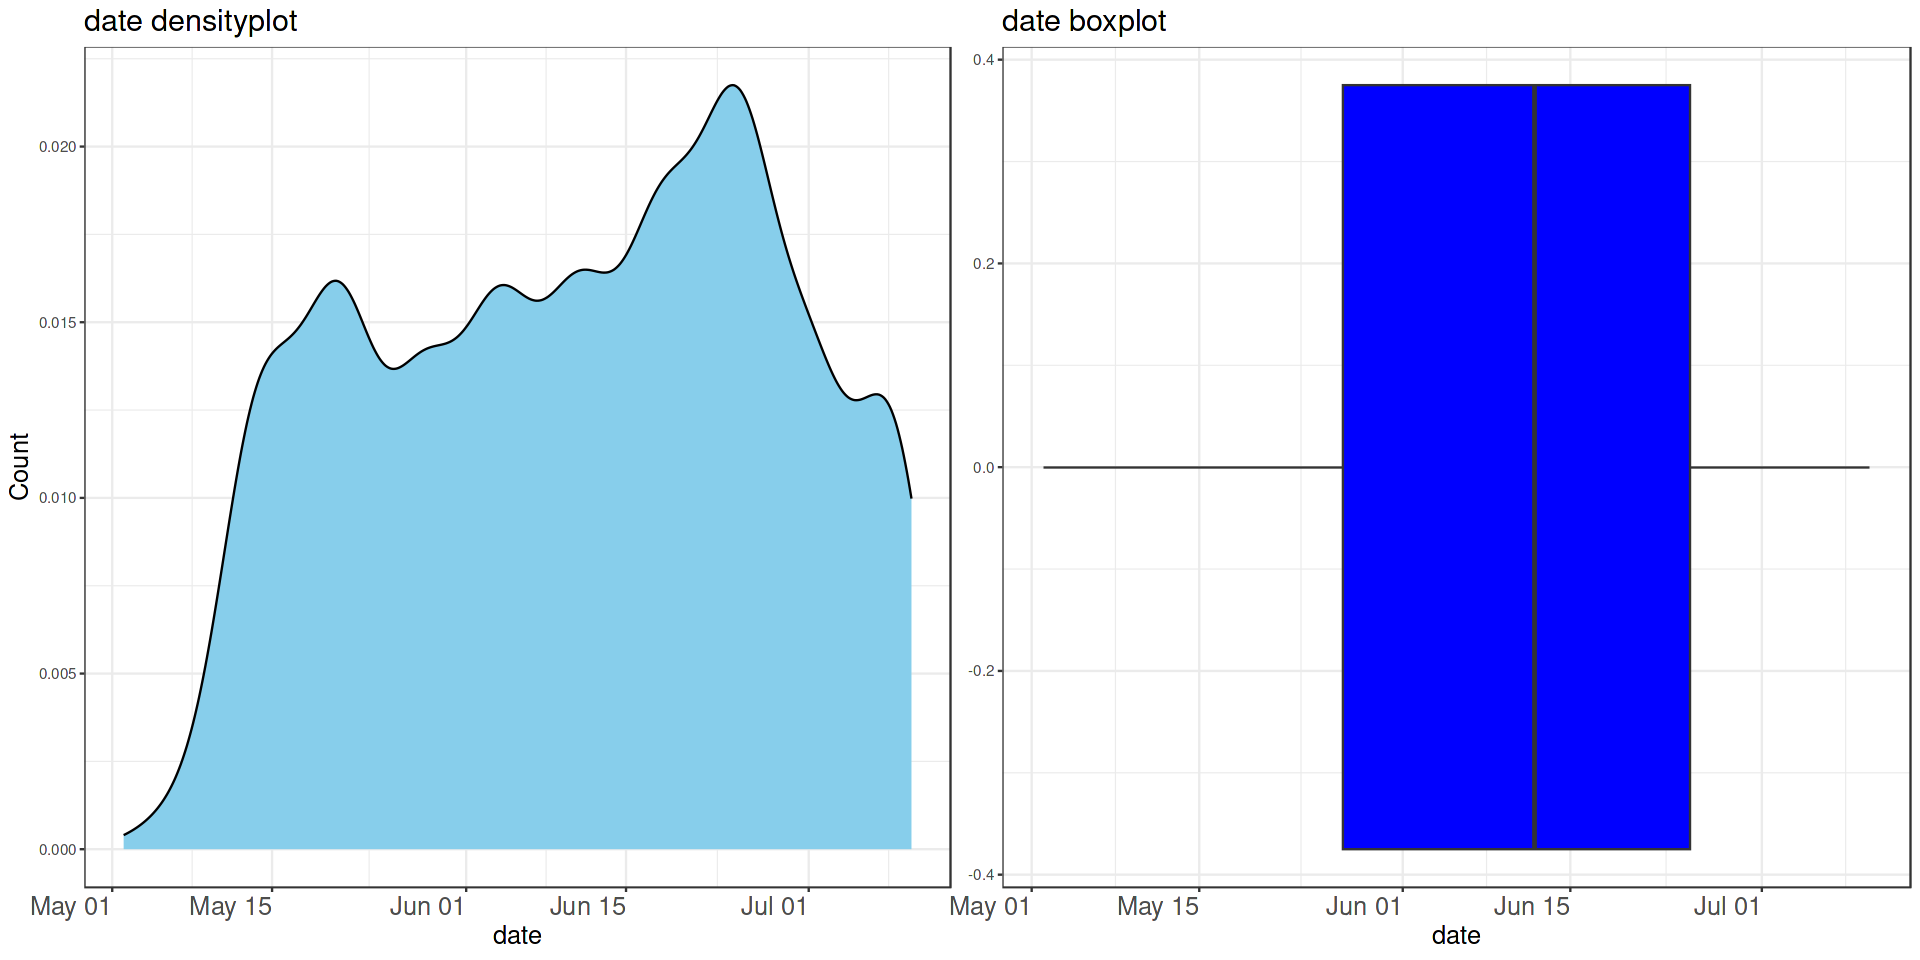

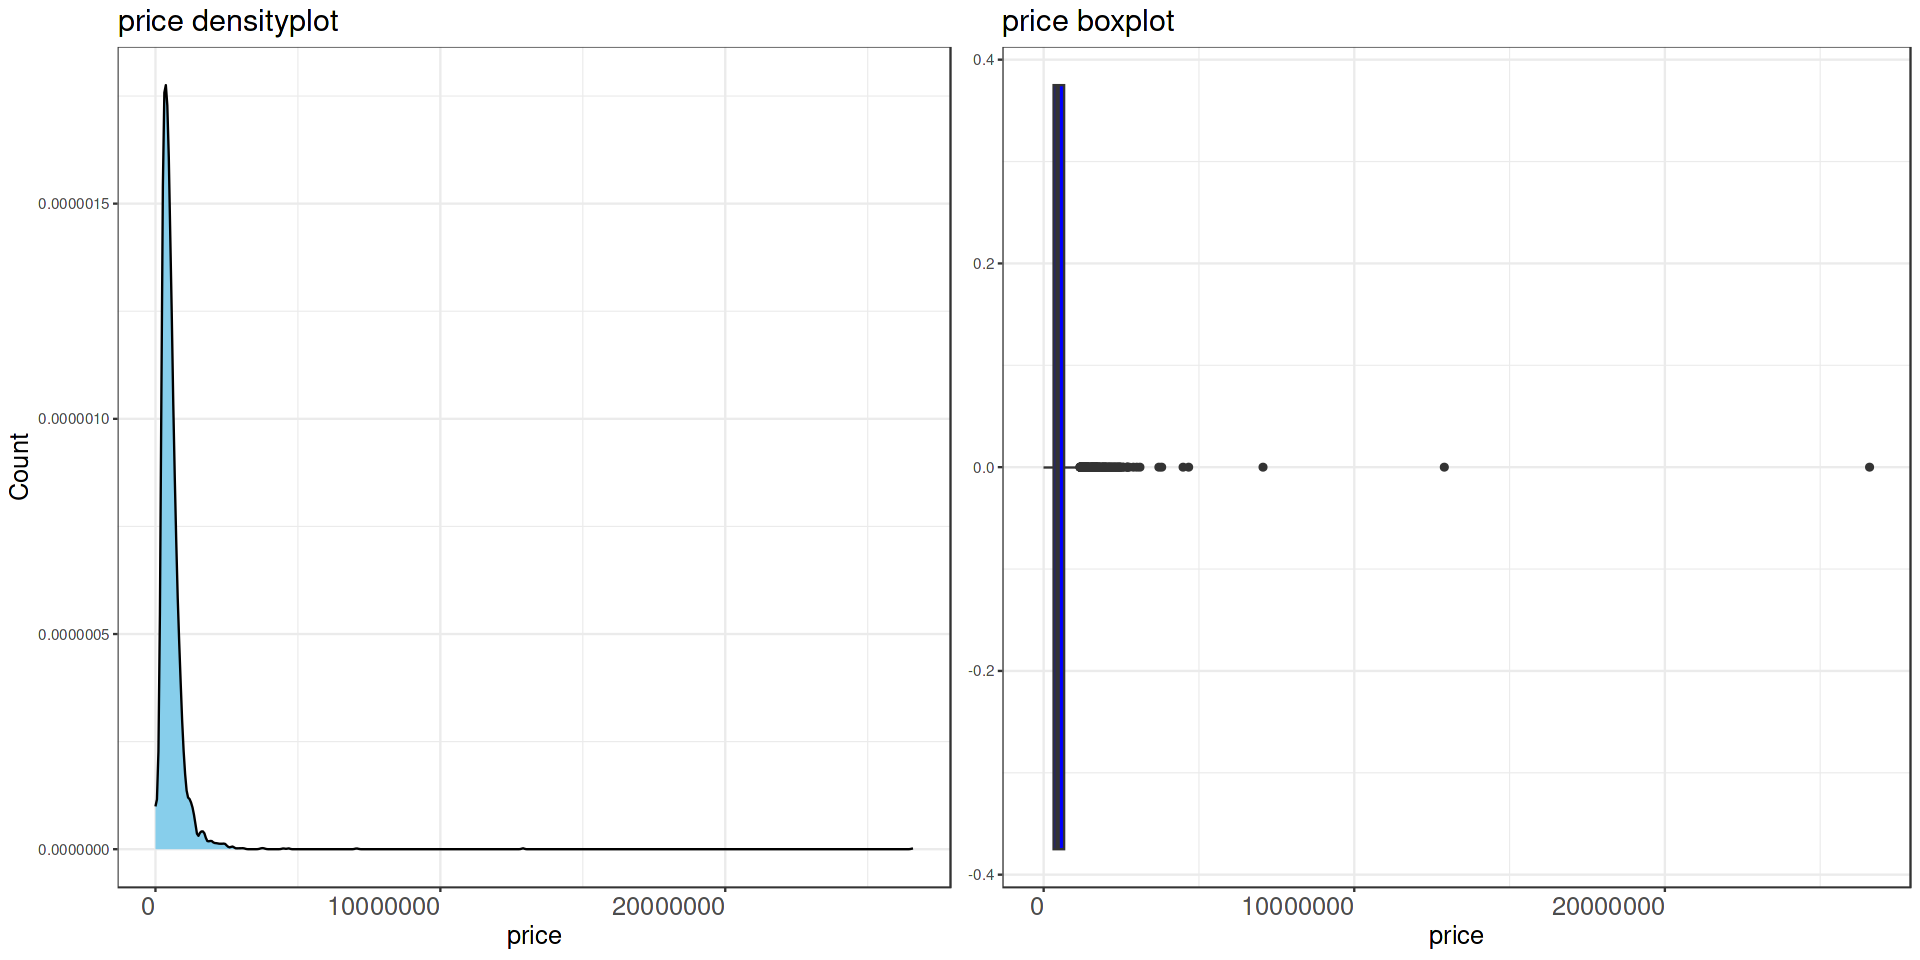

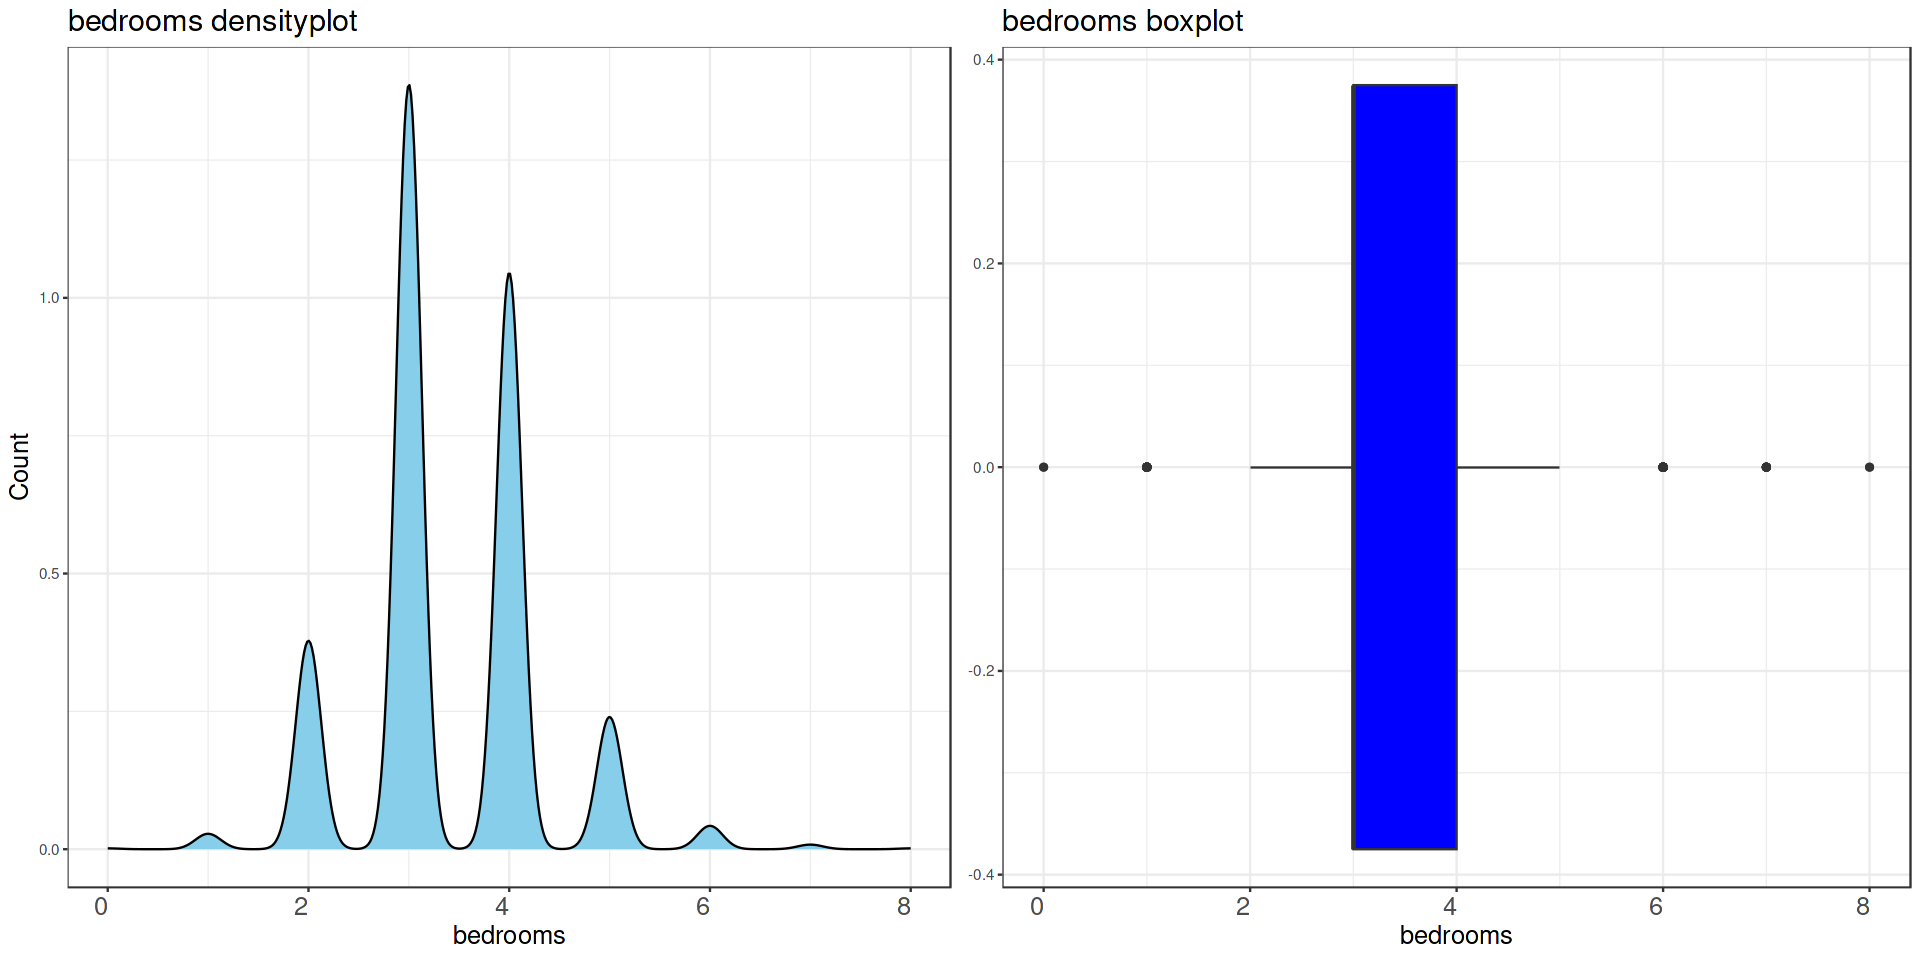

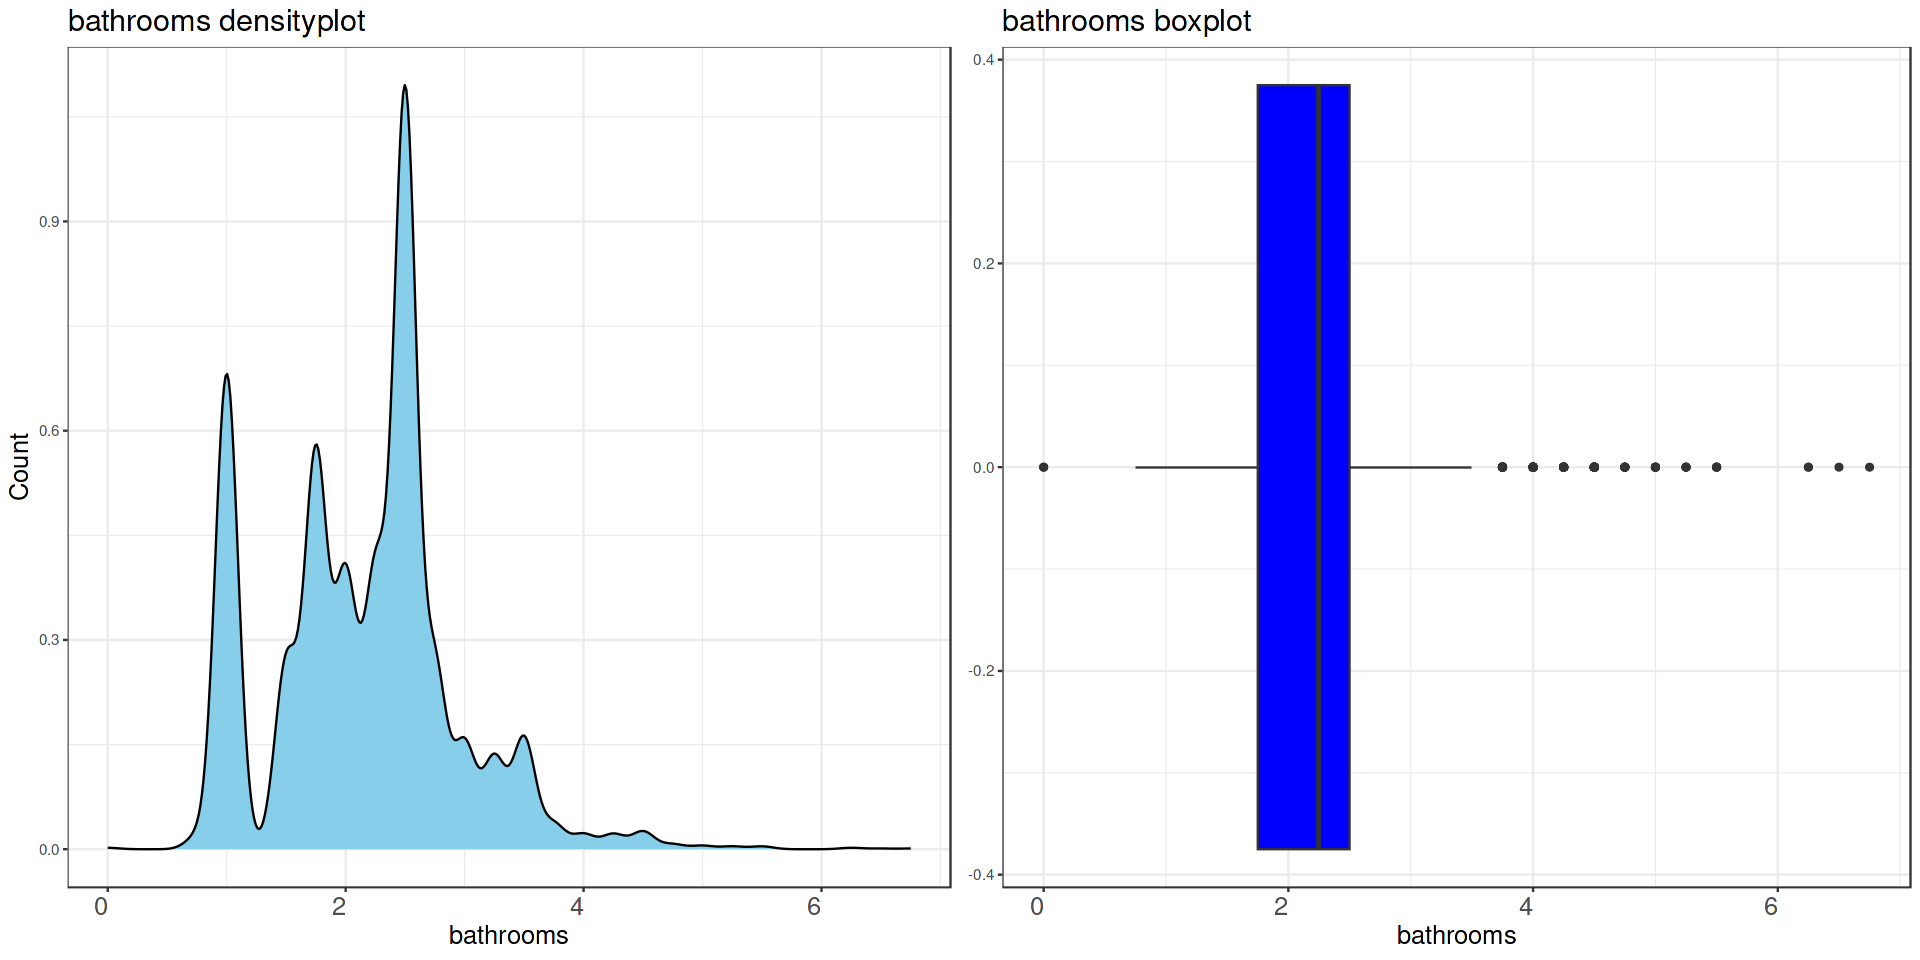

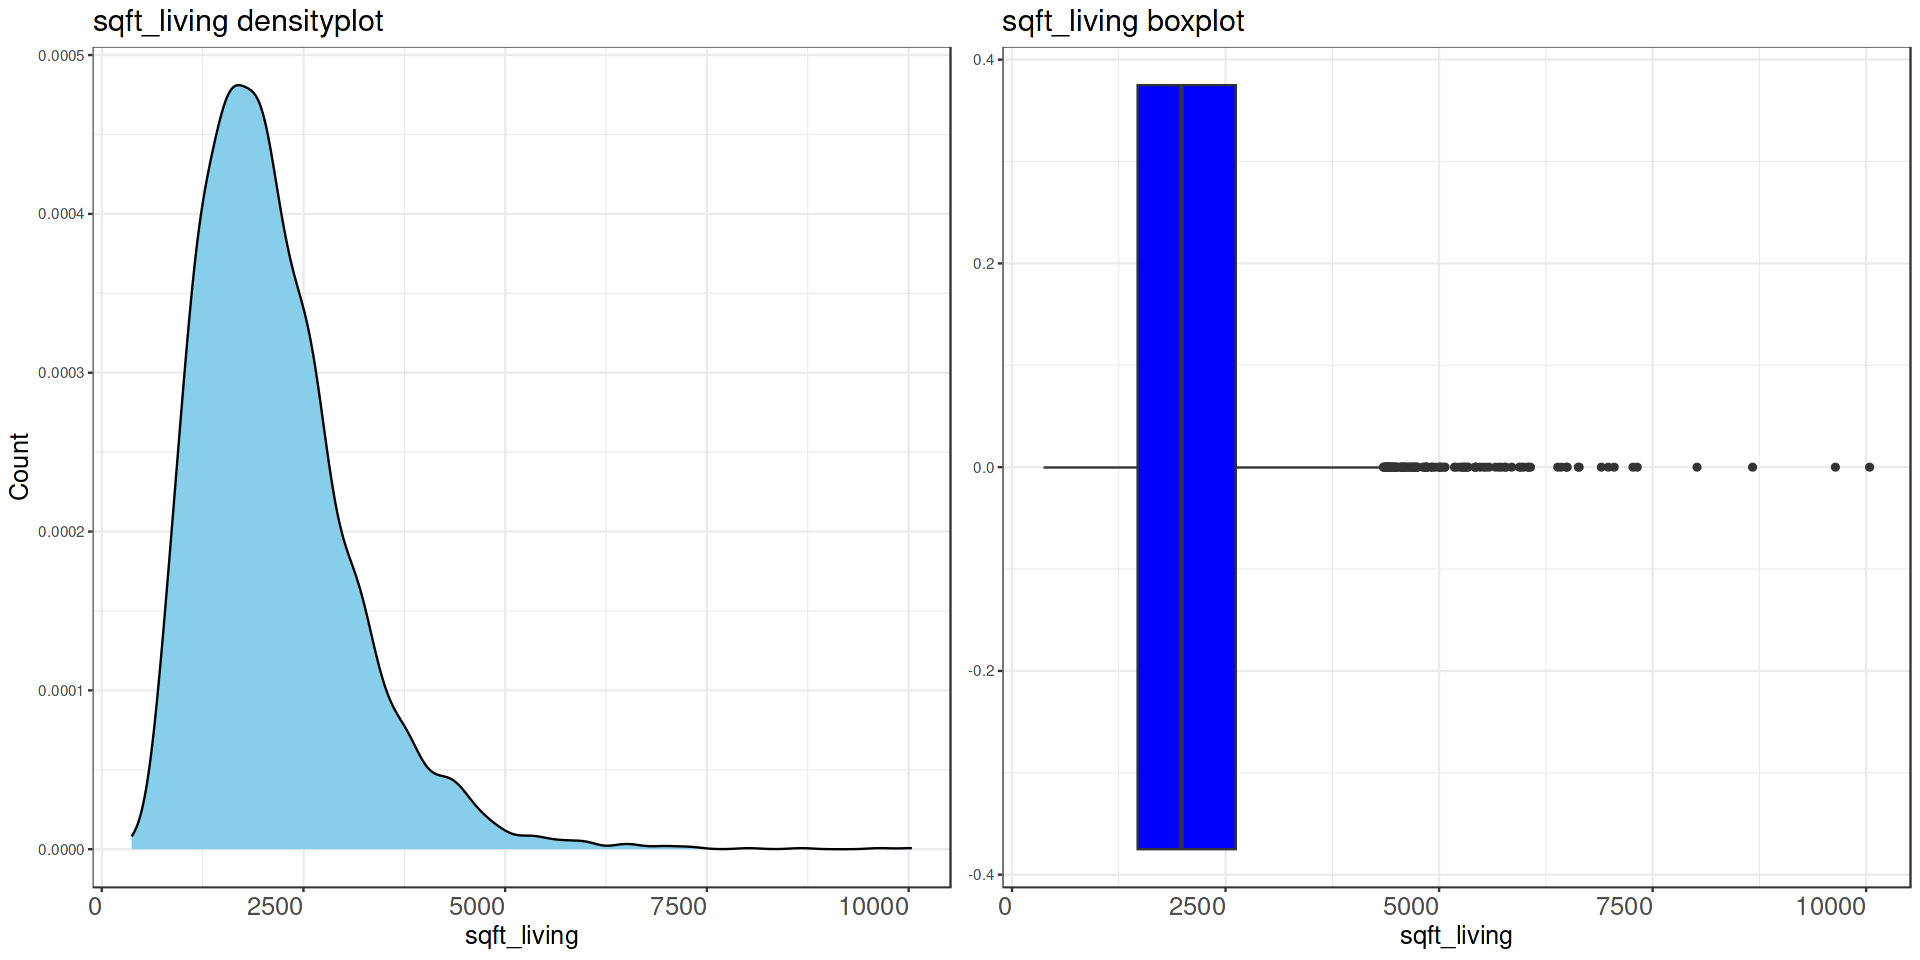

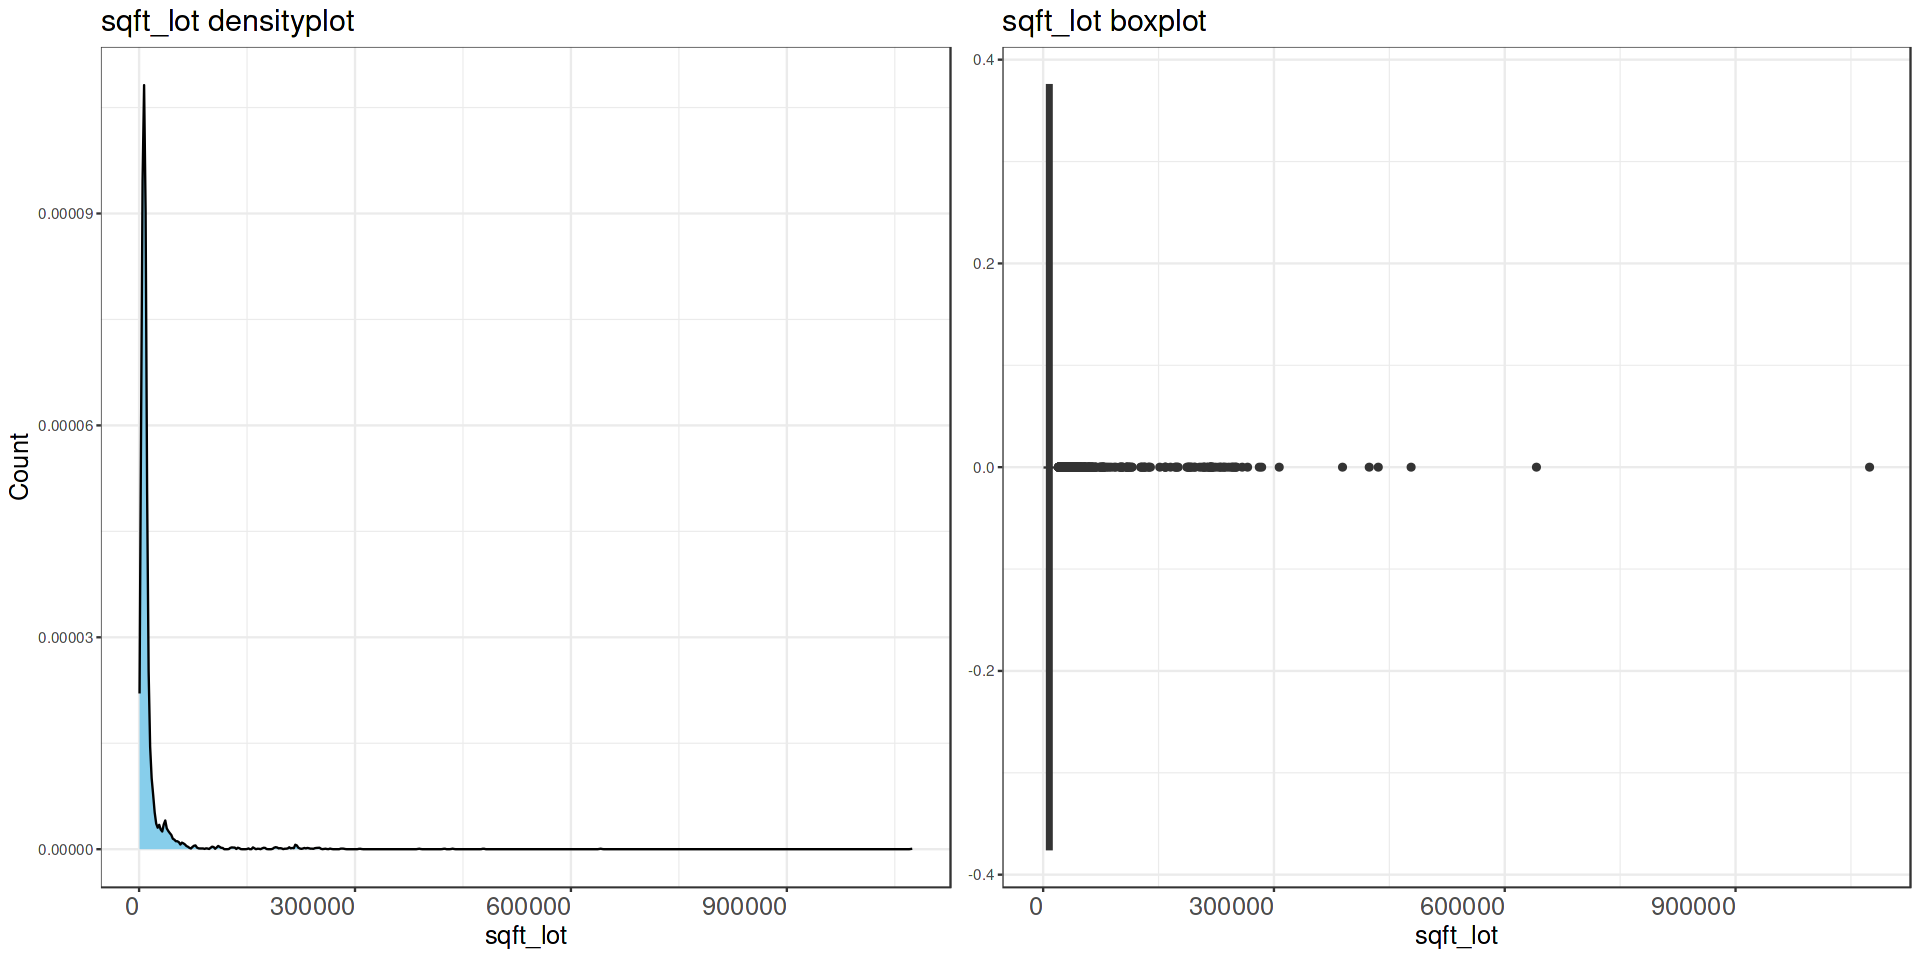

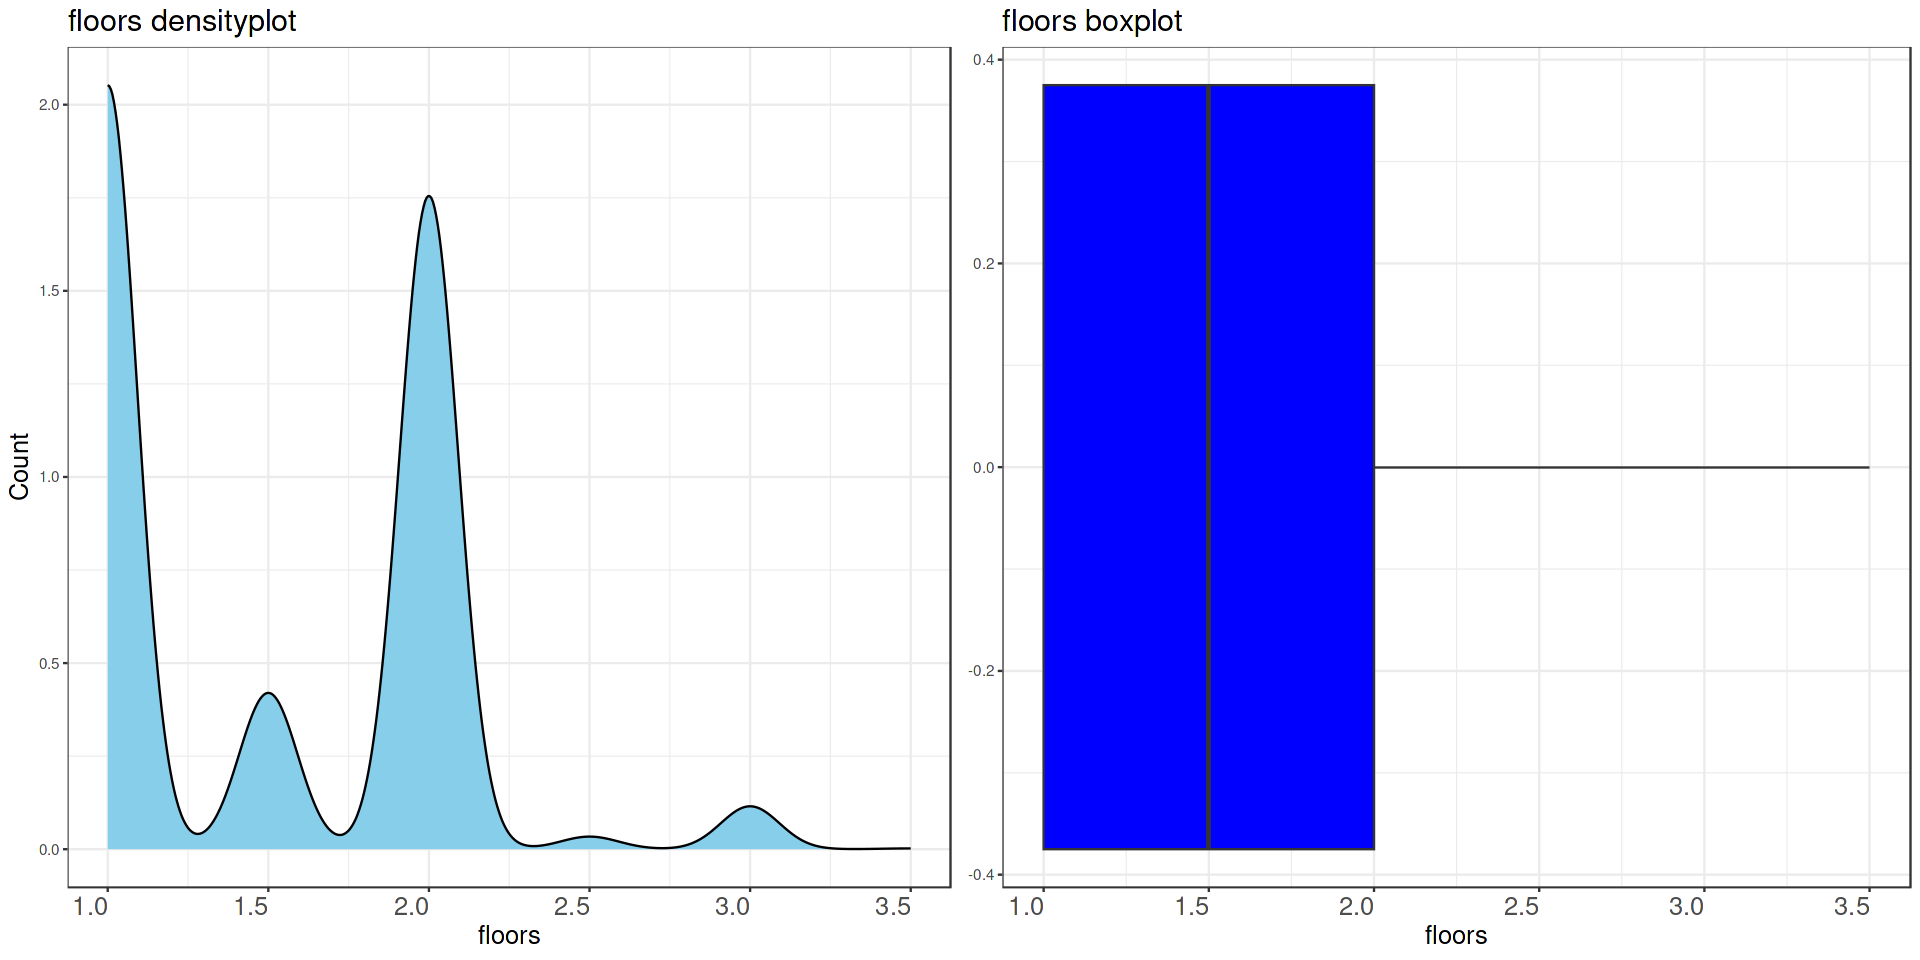

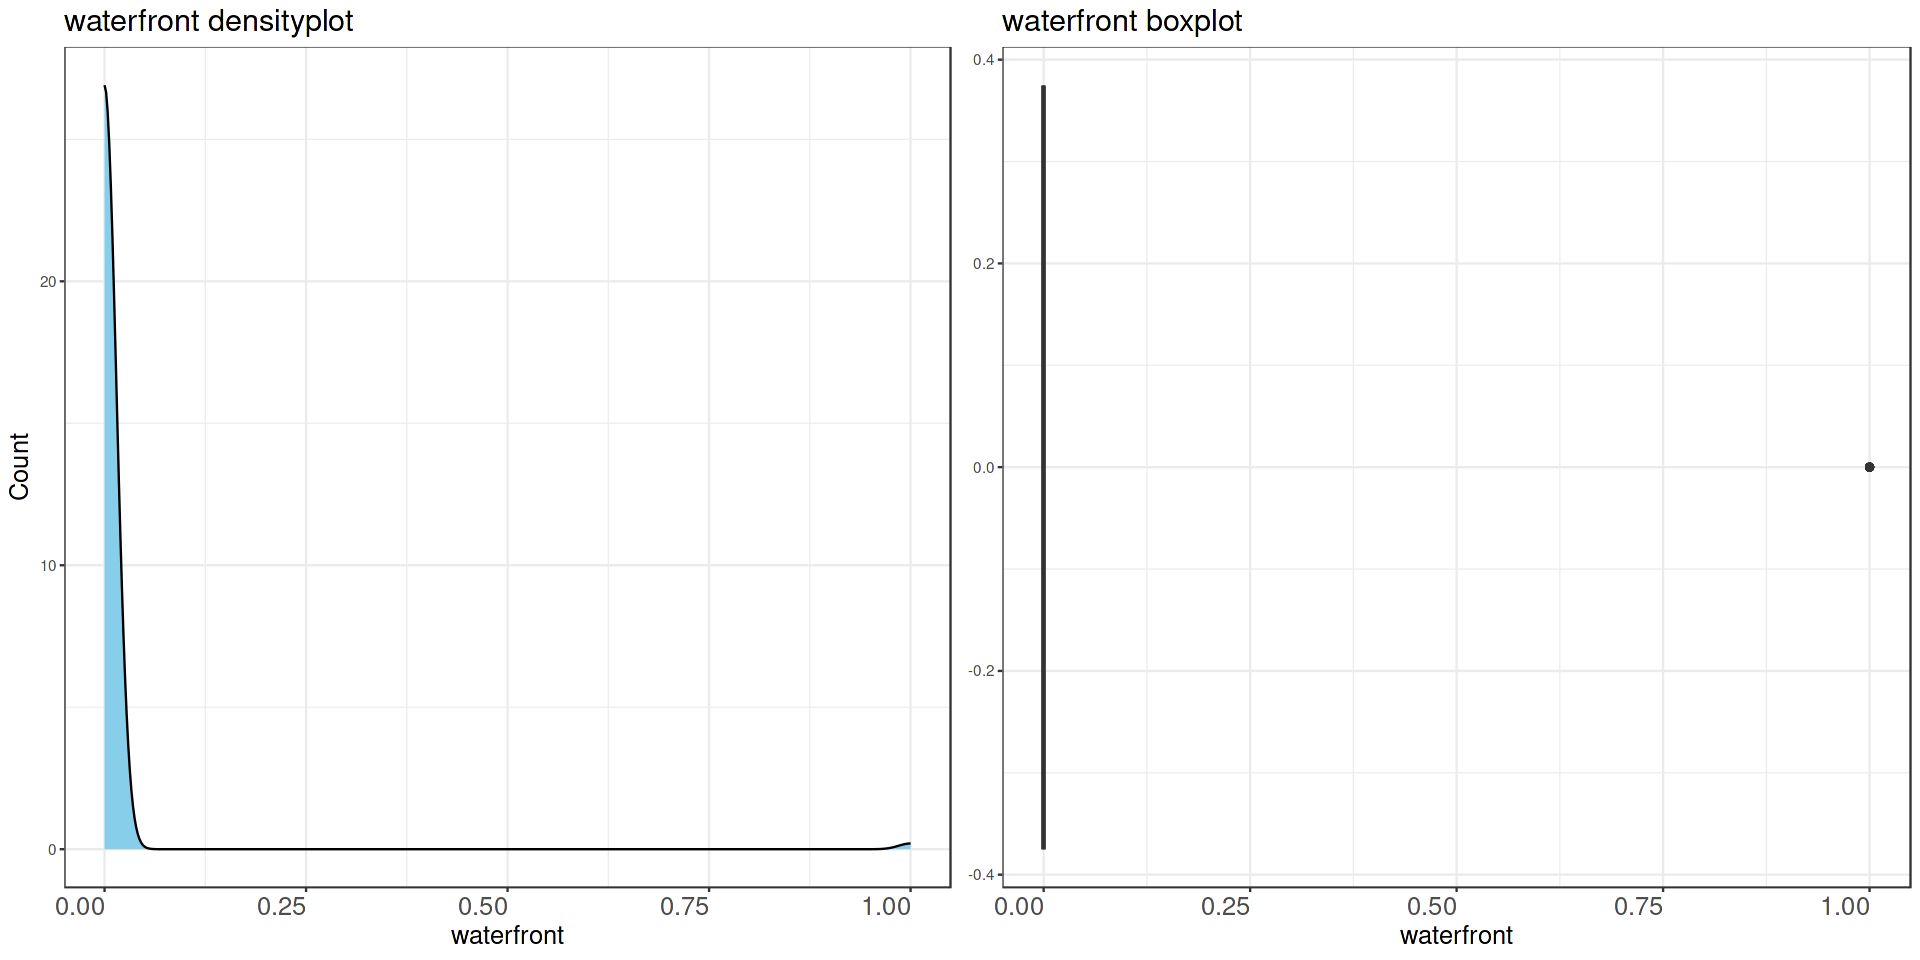

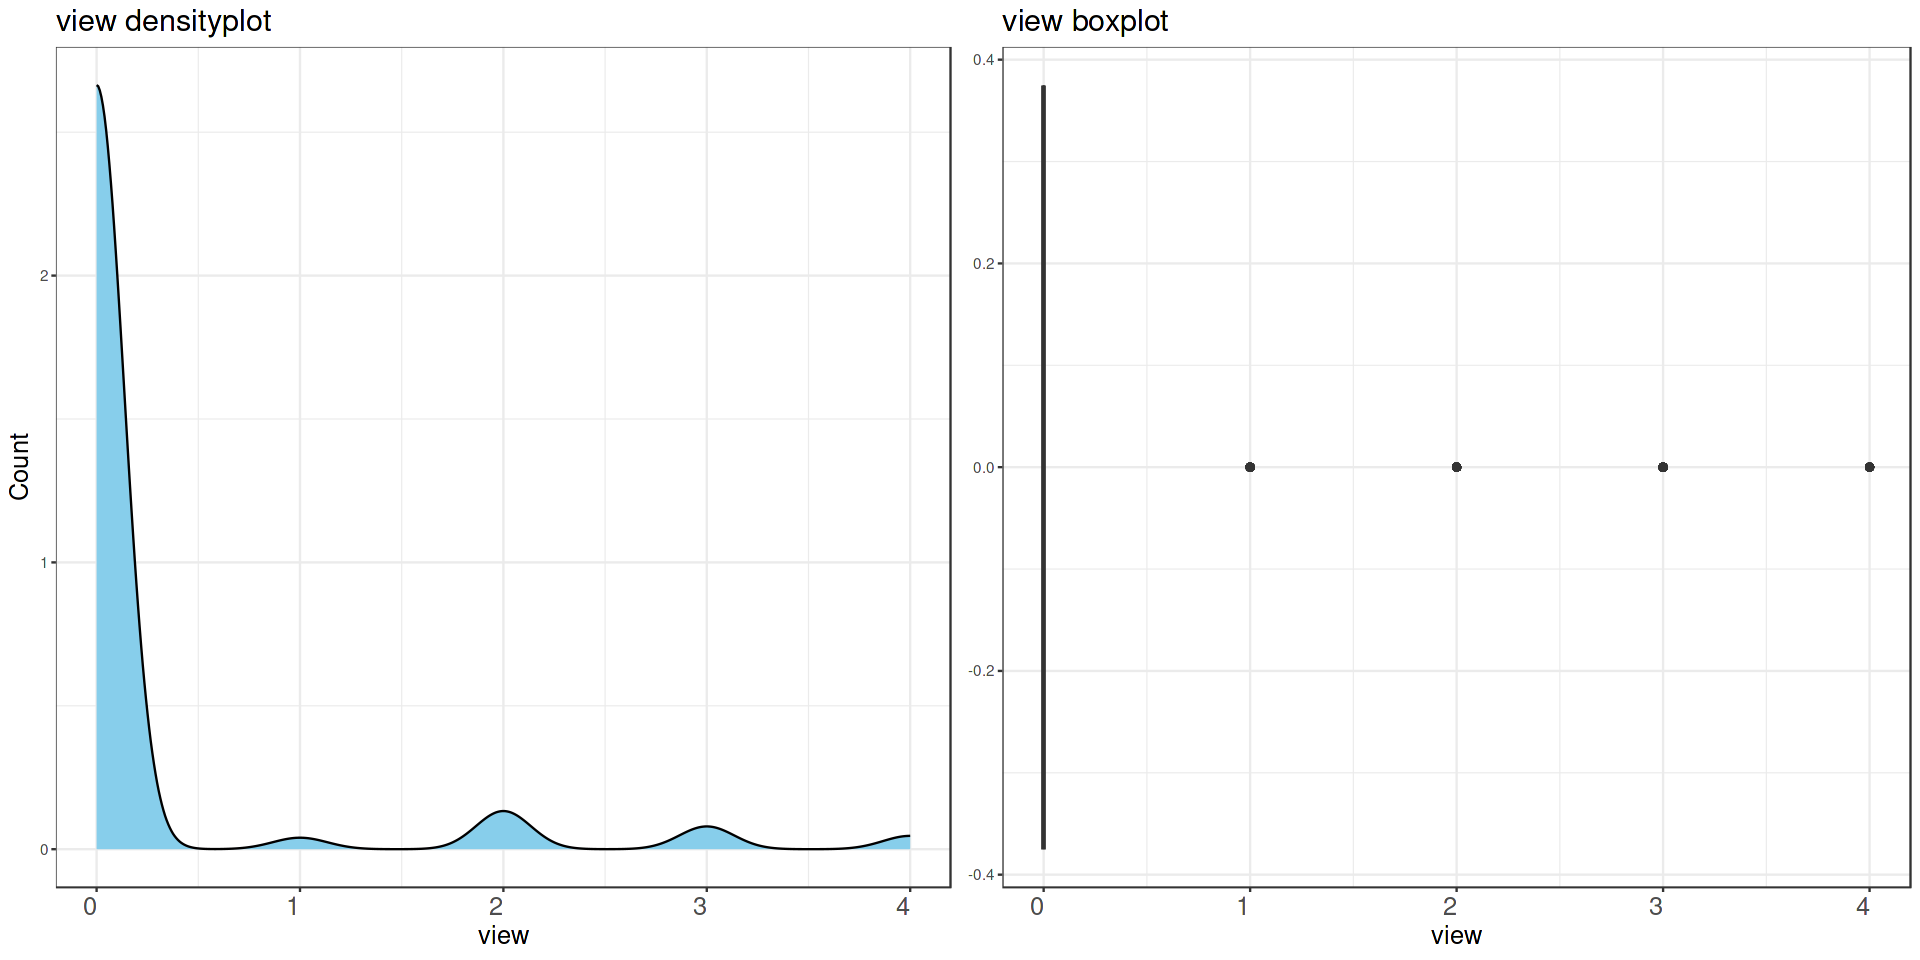

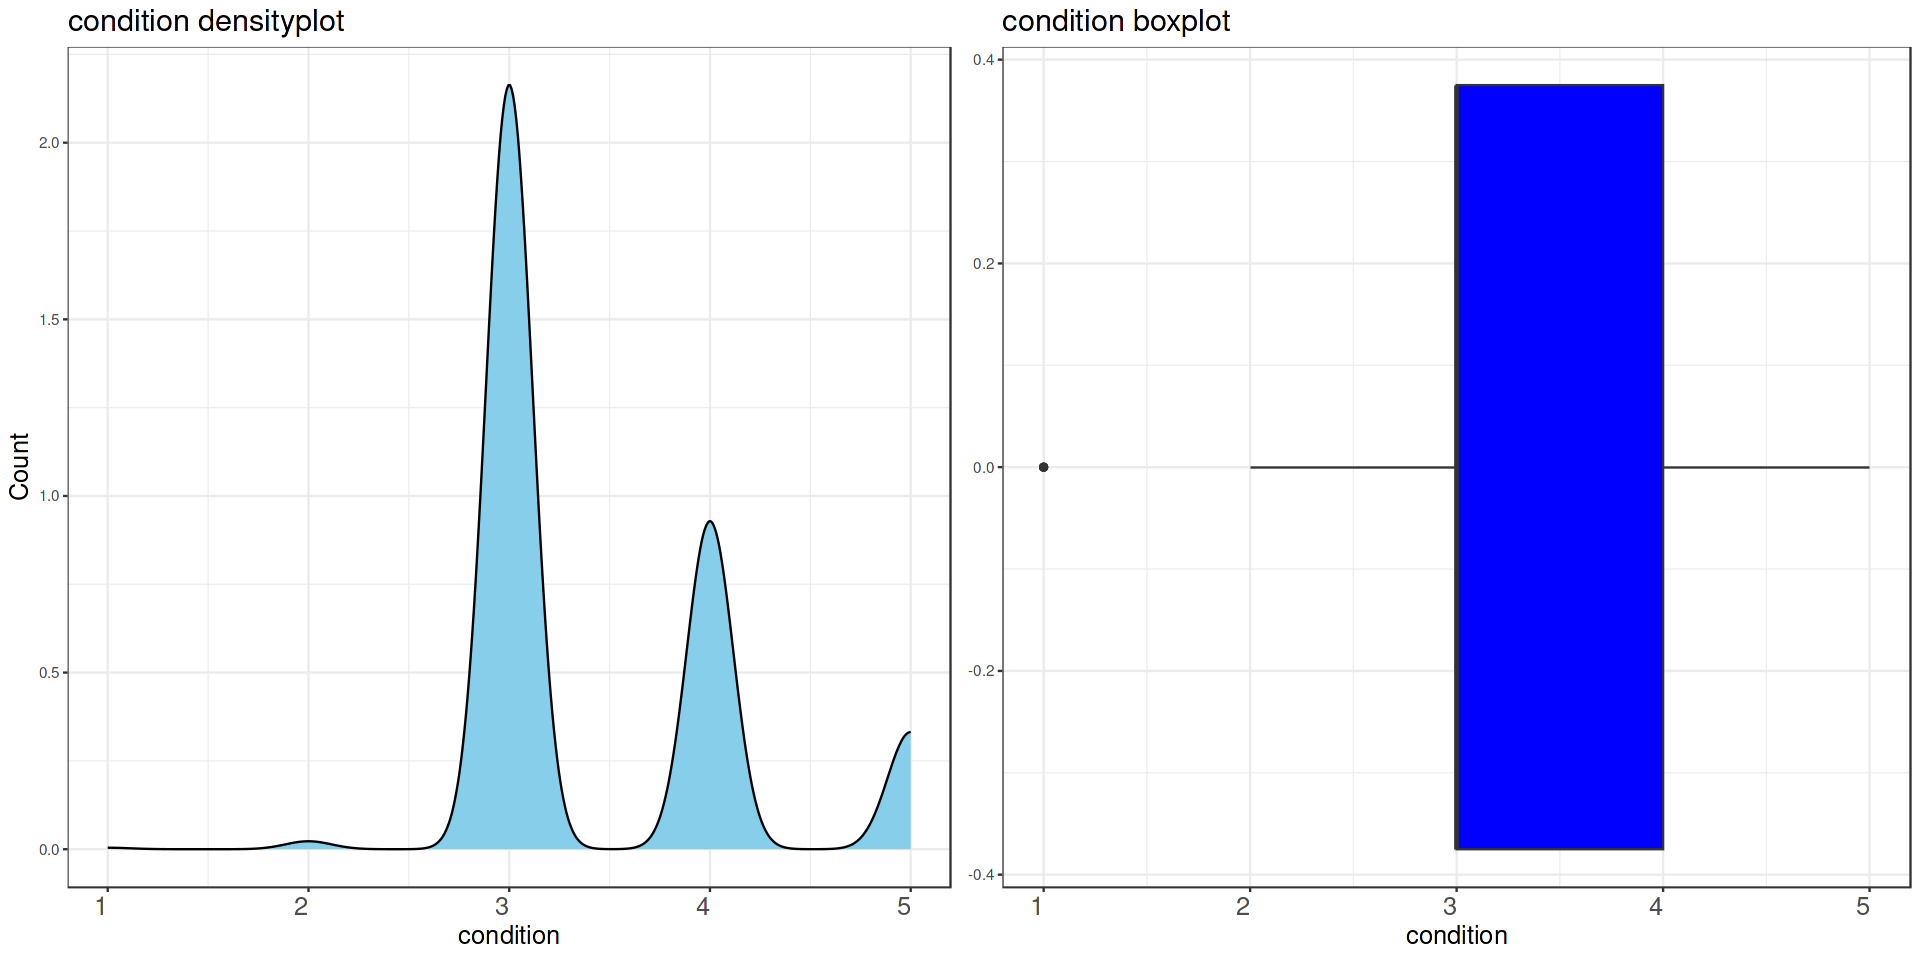

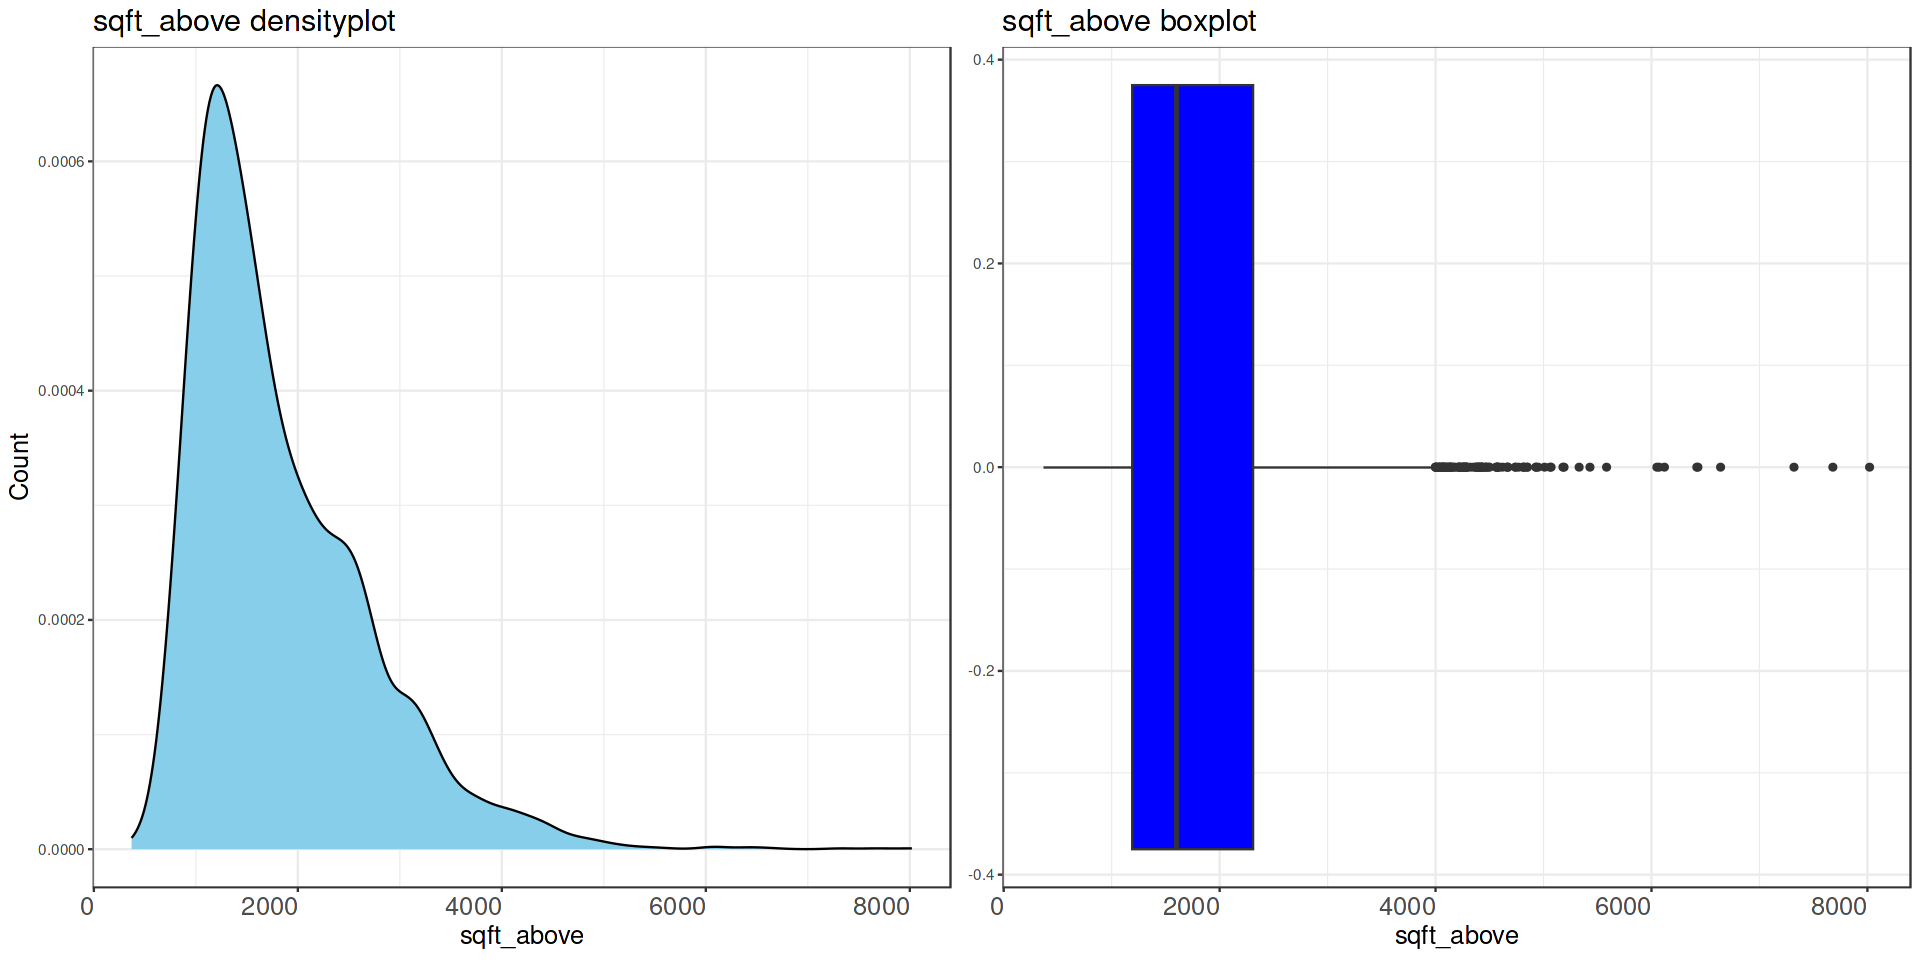

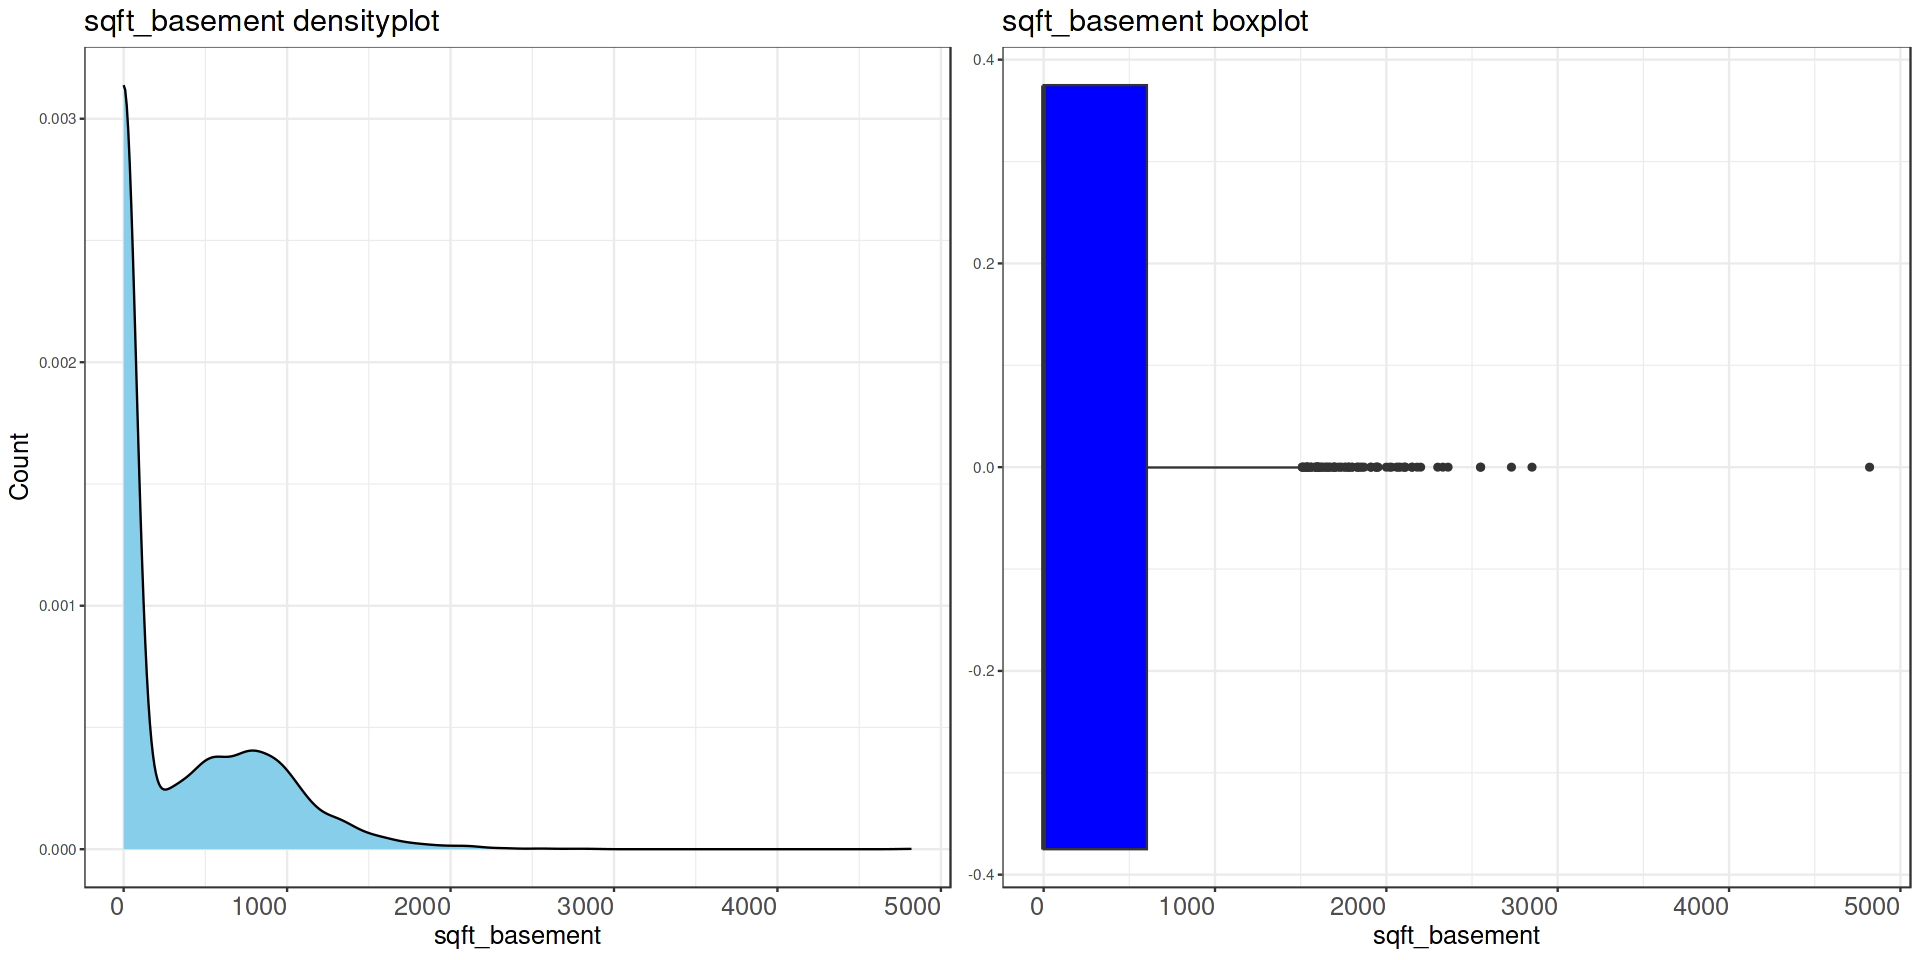

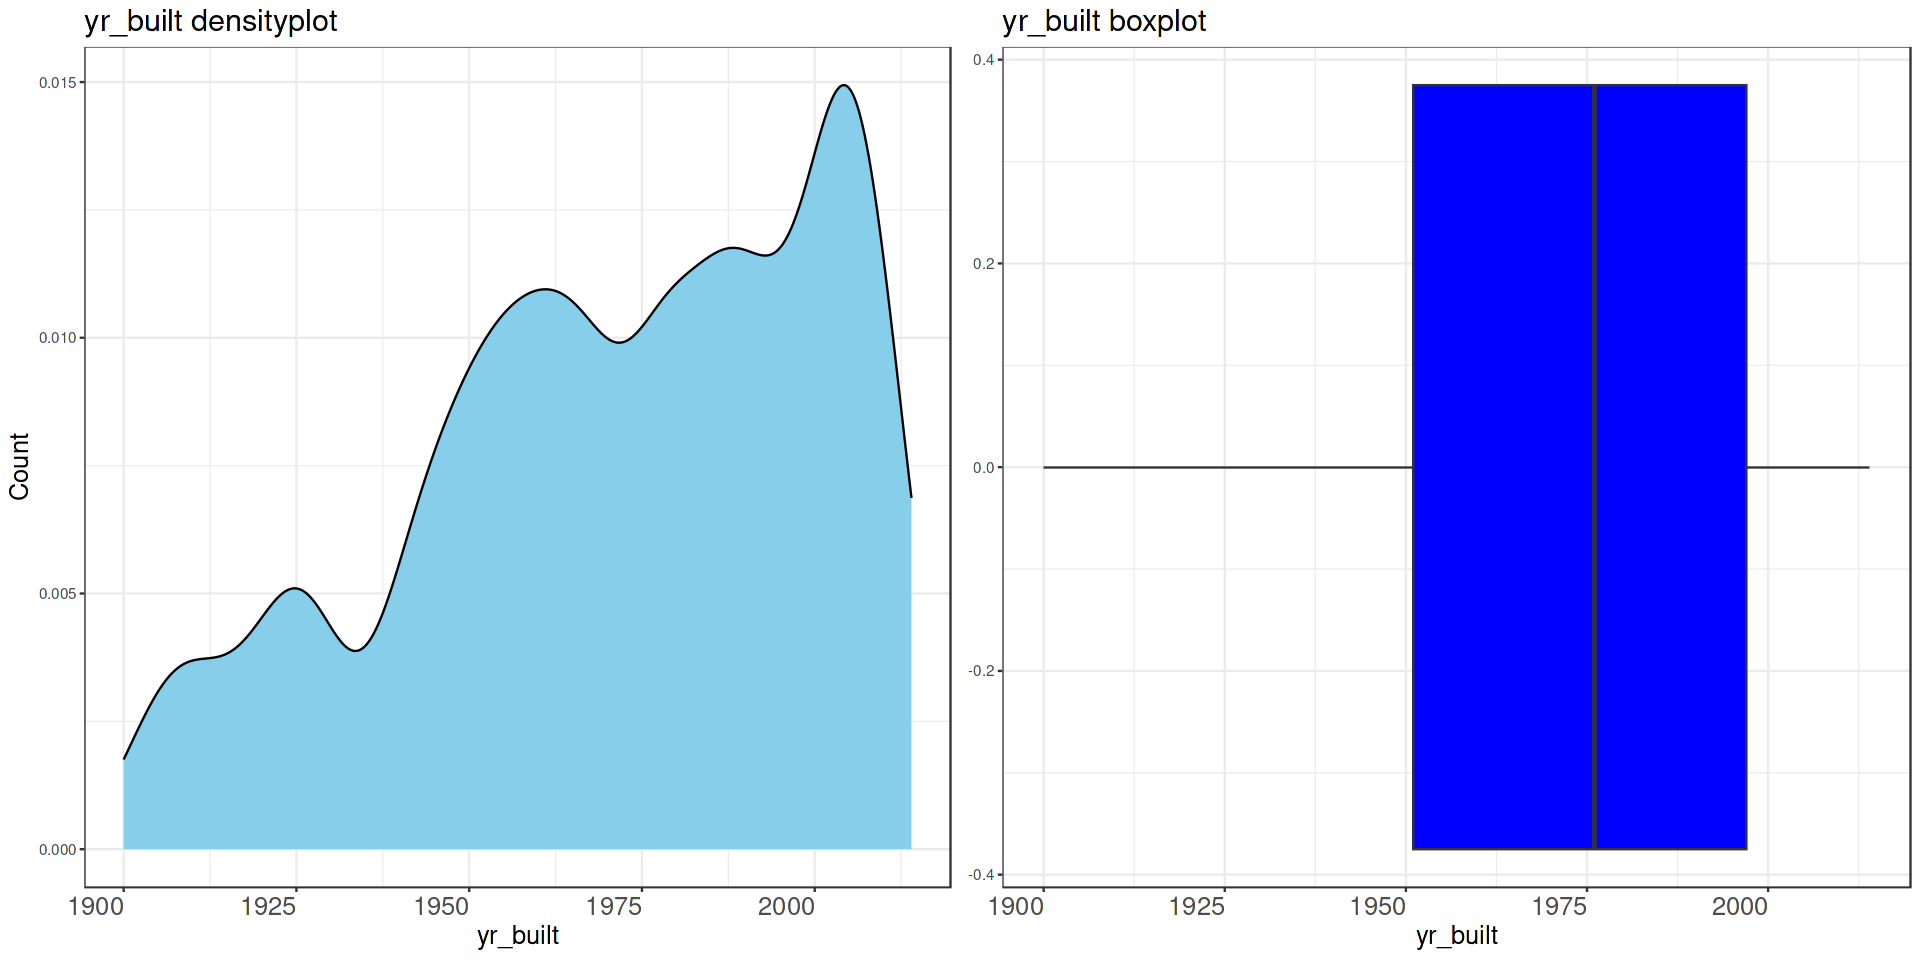

In [14]:
for(i in 1:length(num_cols)){
    a <- ggplot(df) + geom_density(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' densityplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
    
    b <- ggplot(df) + geom_boxplot(aes(x= df[,i]), fill = 'blue') + 
            labs(title = paste0(names(df[i]),' boxplot'), x = names(df[i])) + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )    
    grid.arrange(a,b , ncol = 2)    
}

## **City CountPlot**

In [15]:
options(repr.plot.width = 16.0, repr.plot.height = 12.0)

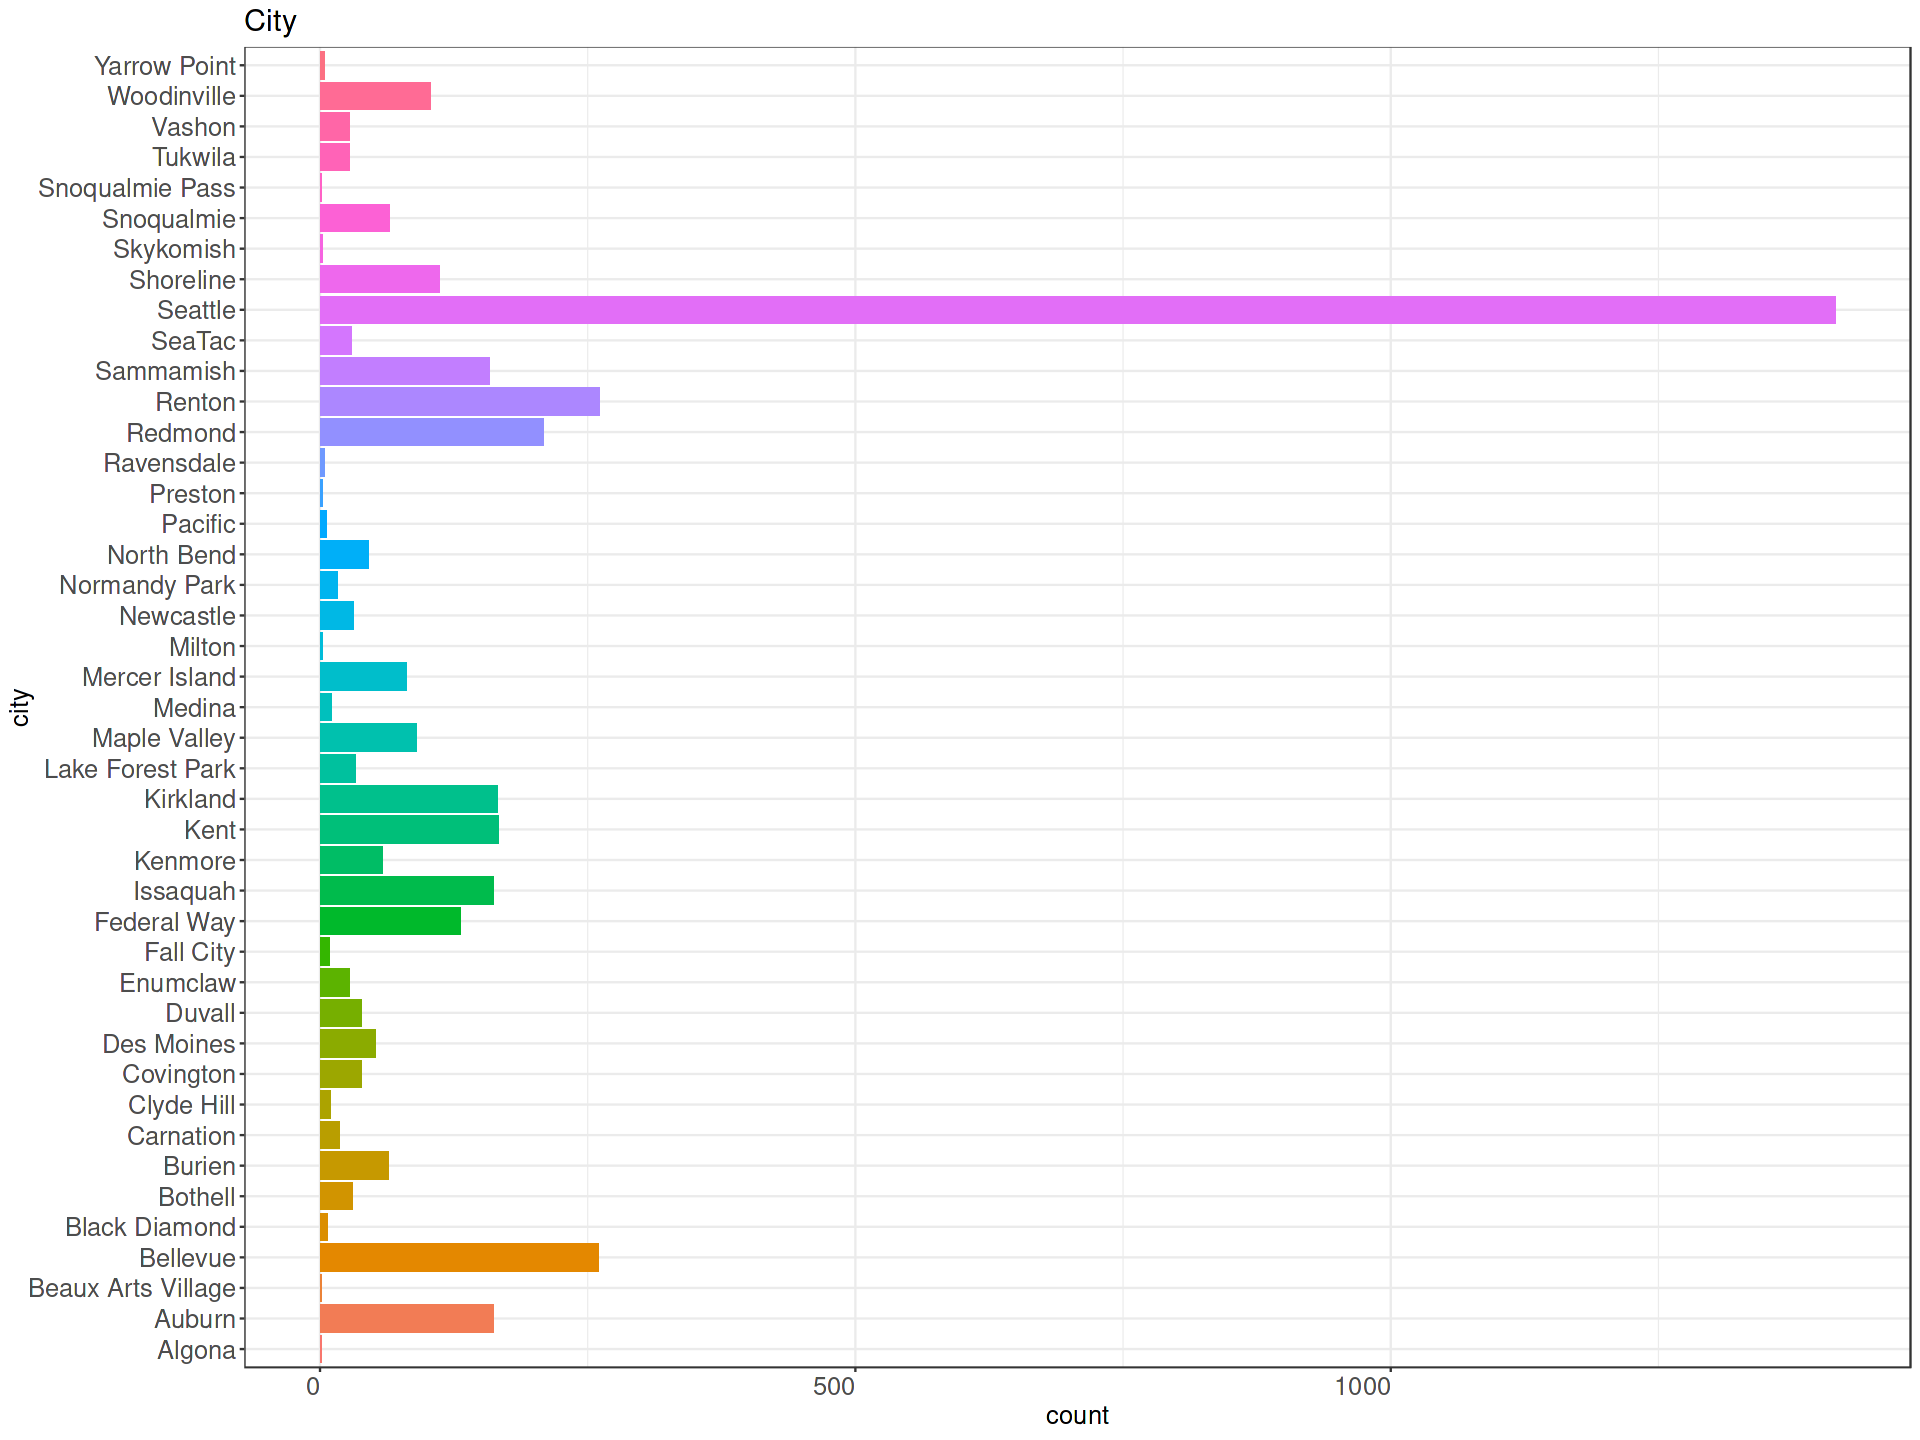

In [16]:
ggplot(df) + geom_bar(aes(y= city , fill = city)) +
    theme_bw() +
    ggtitle('City') + 
    theme(
    legend.position = 'none',
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15, ),
    title = element_text(size=15)
    )

## **Top 5 Cities with the Highest Average House Price**

In [17]:
city_price <- df %>% group_by(city) %>%
                    summarize(avg_price = mean(price, na.rm=T)) %>%
                    arrange(desc(avg_price))

city_price <- city_price[0:5,]

In [18]:
city_price

city,avg_price
<chr>,<dbl>
Medina,2046559.1
Clyde Hill,1343140.0
Yarrow Point,1194837.5
Mercer Island,1111306.4
Bellevue,861636.5


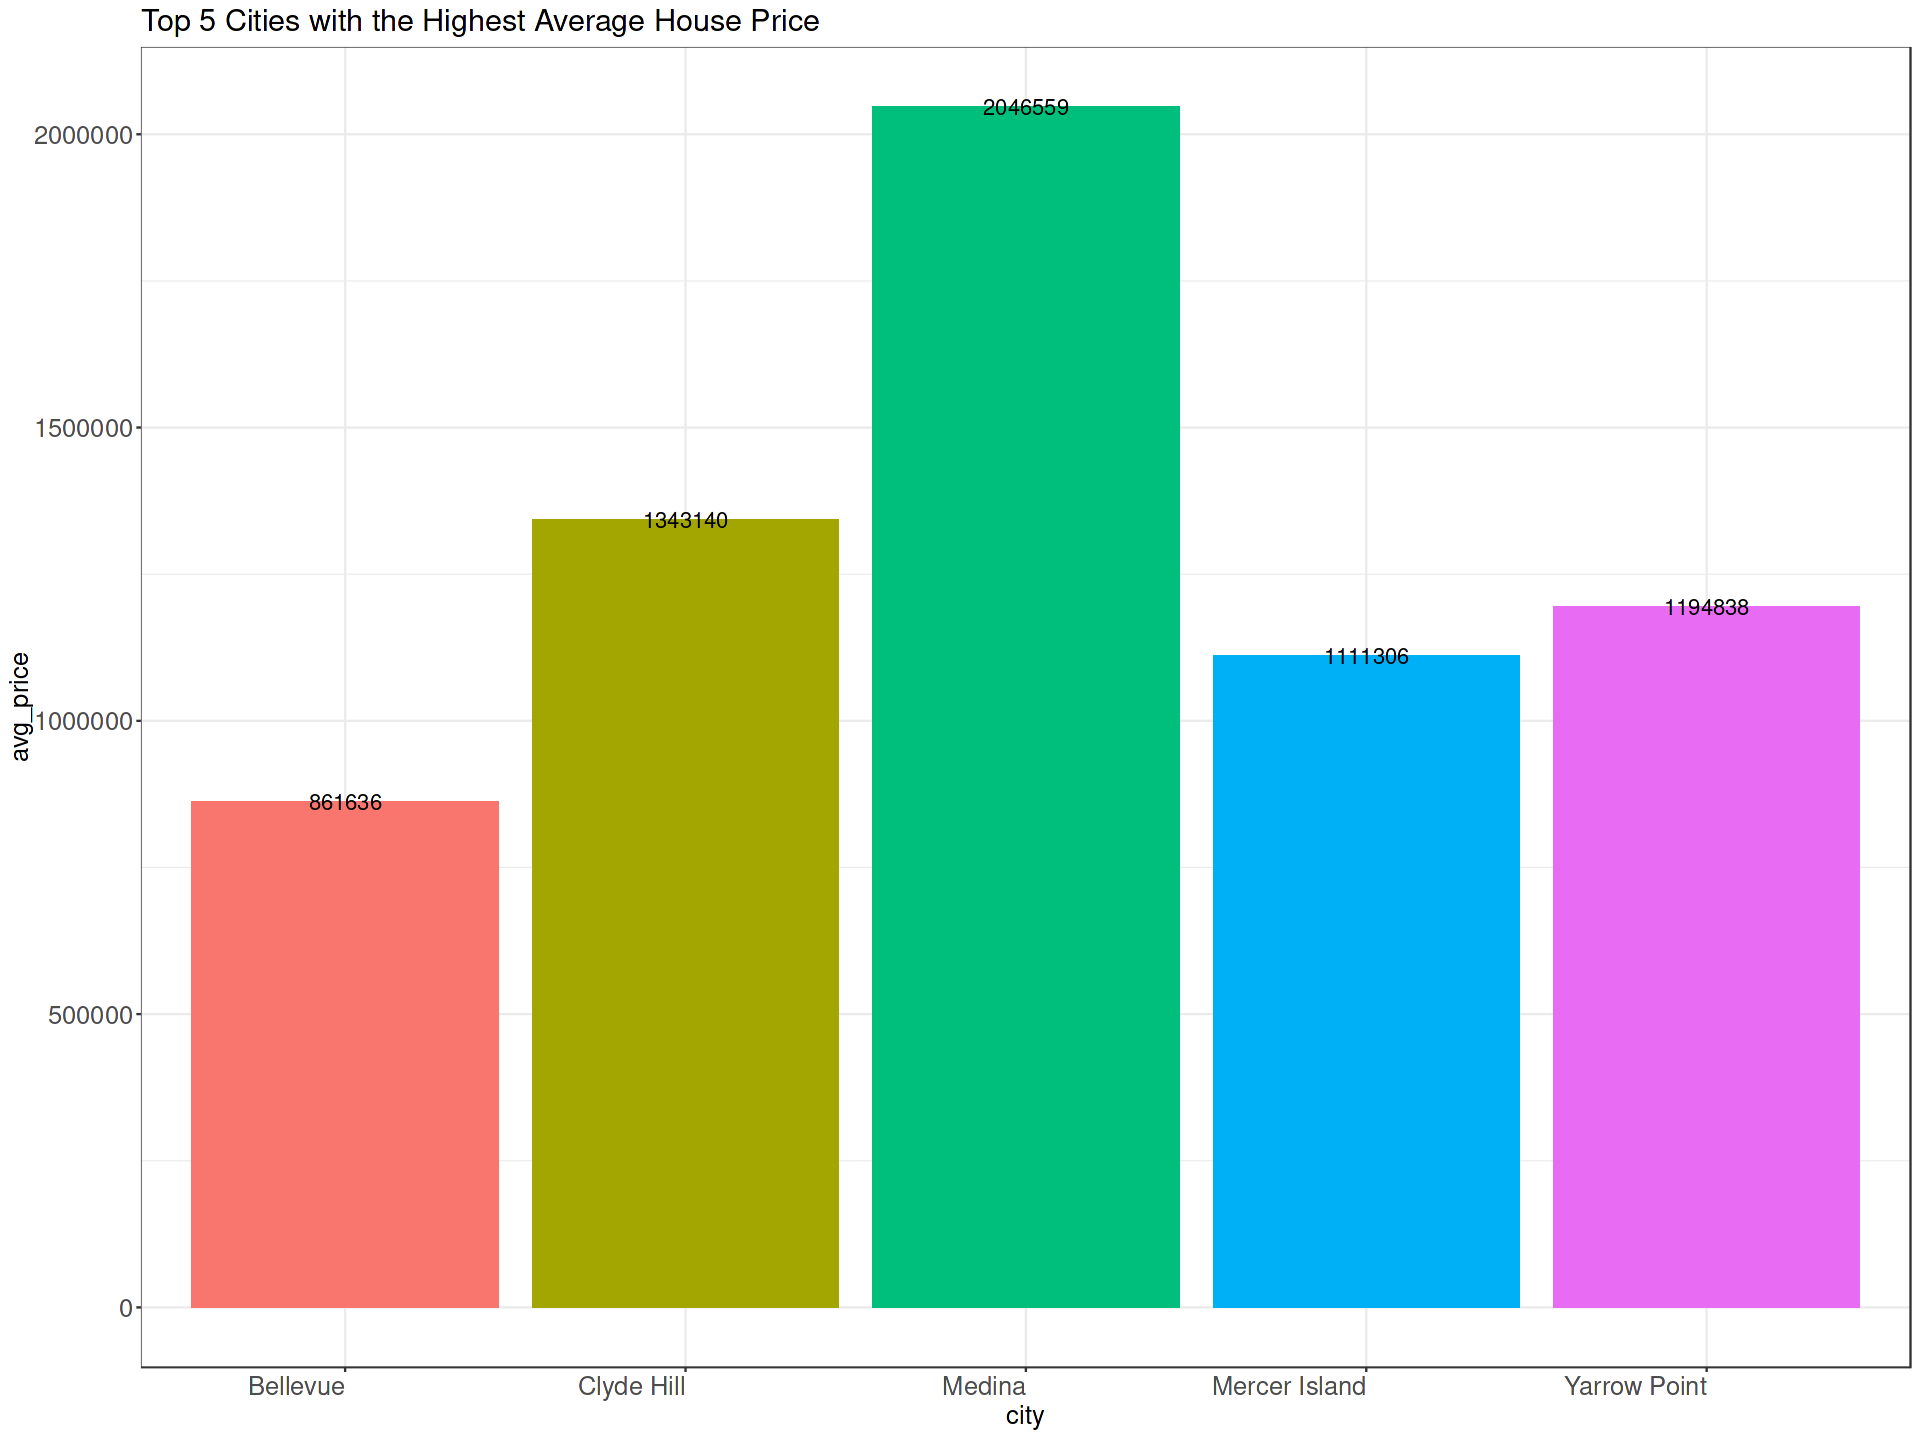

In [19]:
ggplot(city_price) + geom_col(aes(x= city, y= avg_price , fill = city)) +
                        geom_text(aes(x= city, y= avg_price , label = round(avg_price,0), size = 5)) +
                        ggtitle('Top 5 Cities with the Highest Average House Price') +
                        theme_bw() +
                        theme(
                        legend.position = 'none',
                        axis.title = element_text(size=15),
                        axis.text.x = element_text(size = 15, hjust=1),
                        axis.text.y = element_text(size = 15, hjust=1),
                        title = element_text(size=15)
                        )

## **Average house price by floor**

In [20]:
floors_price <- df %>% group_by(floors) %>%
                    summarize(avg_price = mean(price, na.rm=T)) %>%
                    arrange(desc(avg_price))

floors_price$floors <- as.factor(floors_price$floors)

In [21]:
floors_price

floors,avg_price
<fct>,<dbl>
2.5,928575.0
3.5,829250.0
2,649502.8
1.5,570214.5
3,563316.8
1,460075.0


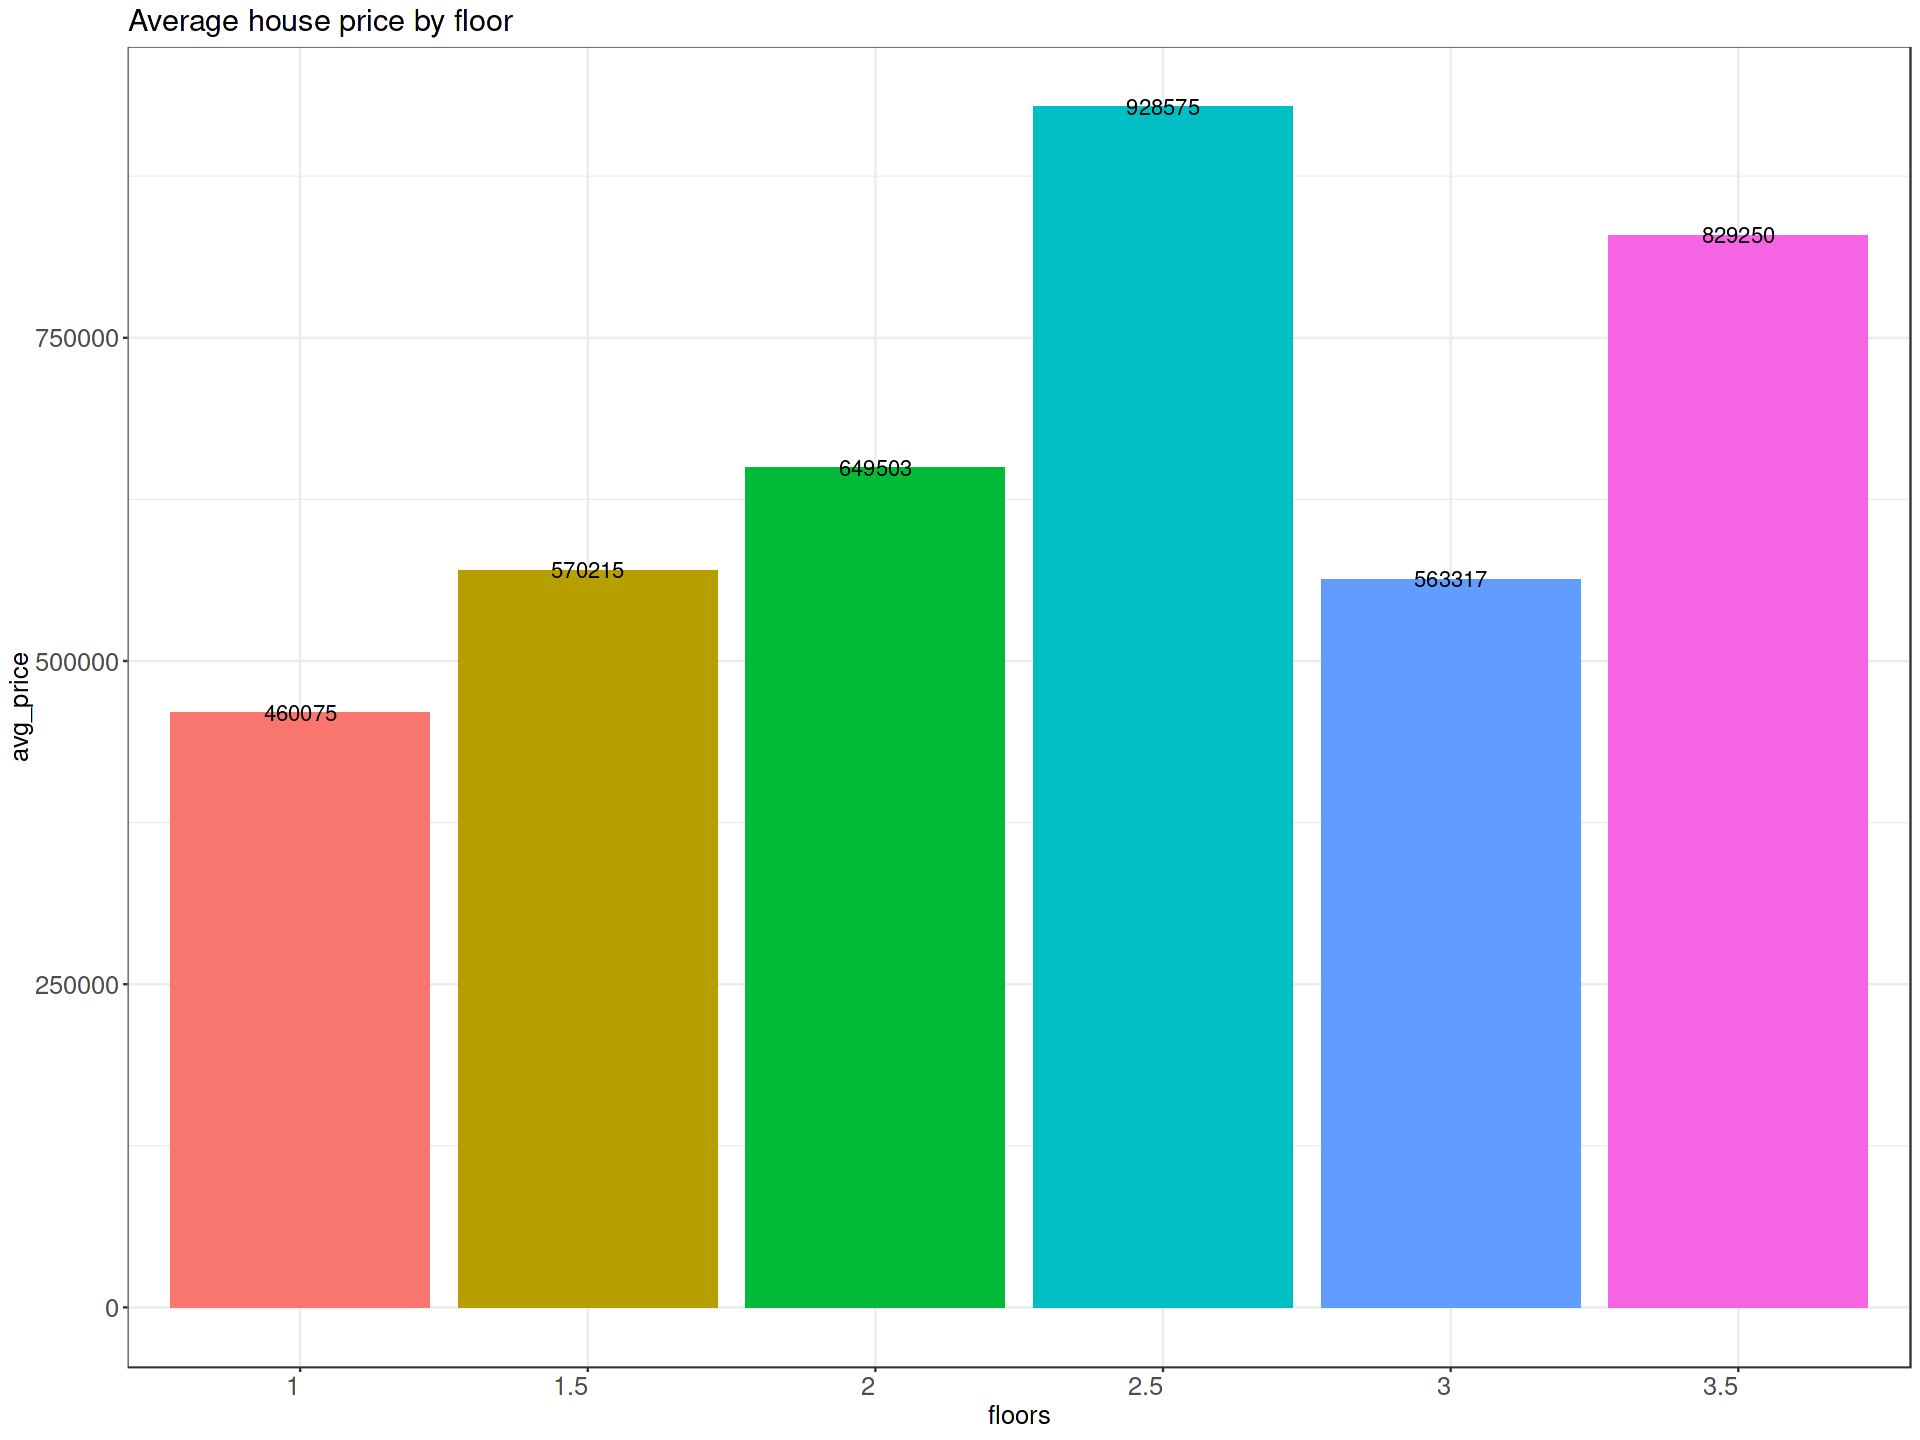

In [22]:
ggplot(floors_price) + geom_col(aes(x= floors, y= avg_price , fill = floors)) +
                        geom_text(aes(x= floors, y= avg_price , label = round(avg_price,0), size = 5)) +
                        ggtitle('Average house price by floor') +
                        xlab('floors') +
                        theme_bw() +
                        theme(
                        legend.position = 'none',
                        axis.title = element_text(size=15),
                        axis.text.x = element_text(size = 15, hjust=1),
                        axis.text.y = element_text(size = 15, hjust=1),
                        title = element_text(size=15)
                        )

## **Correlation**

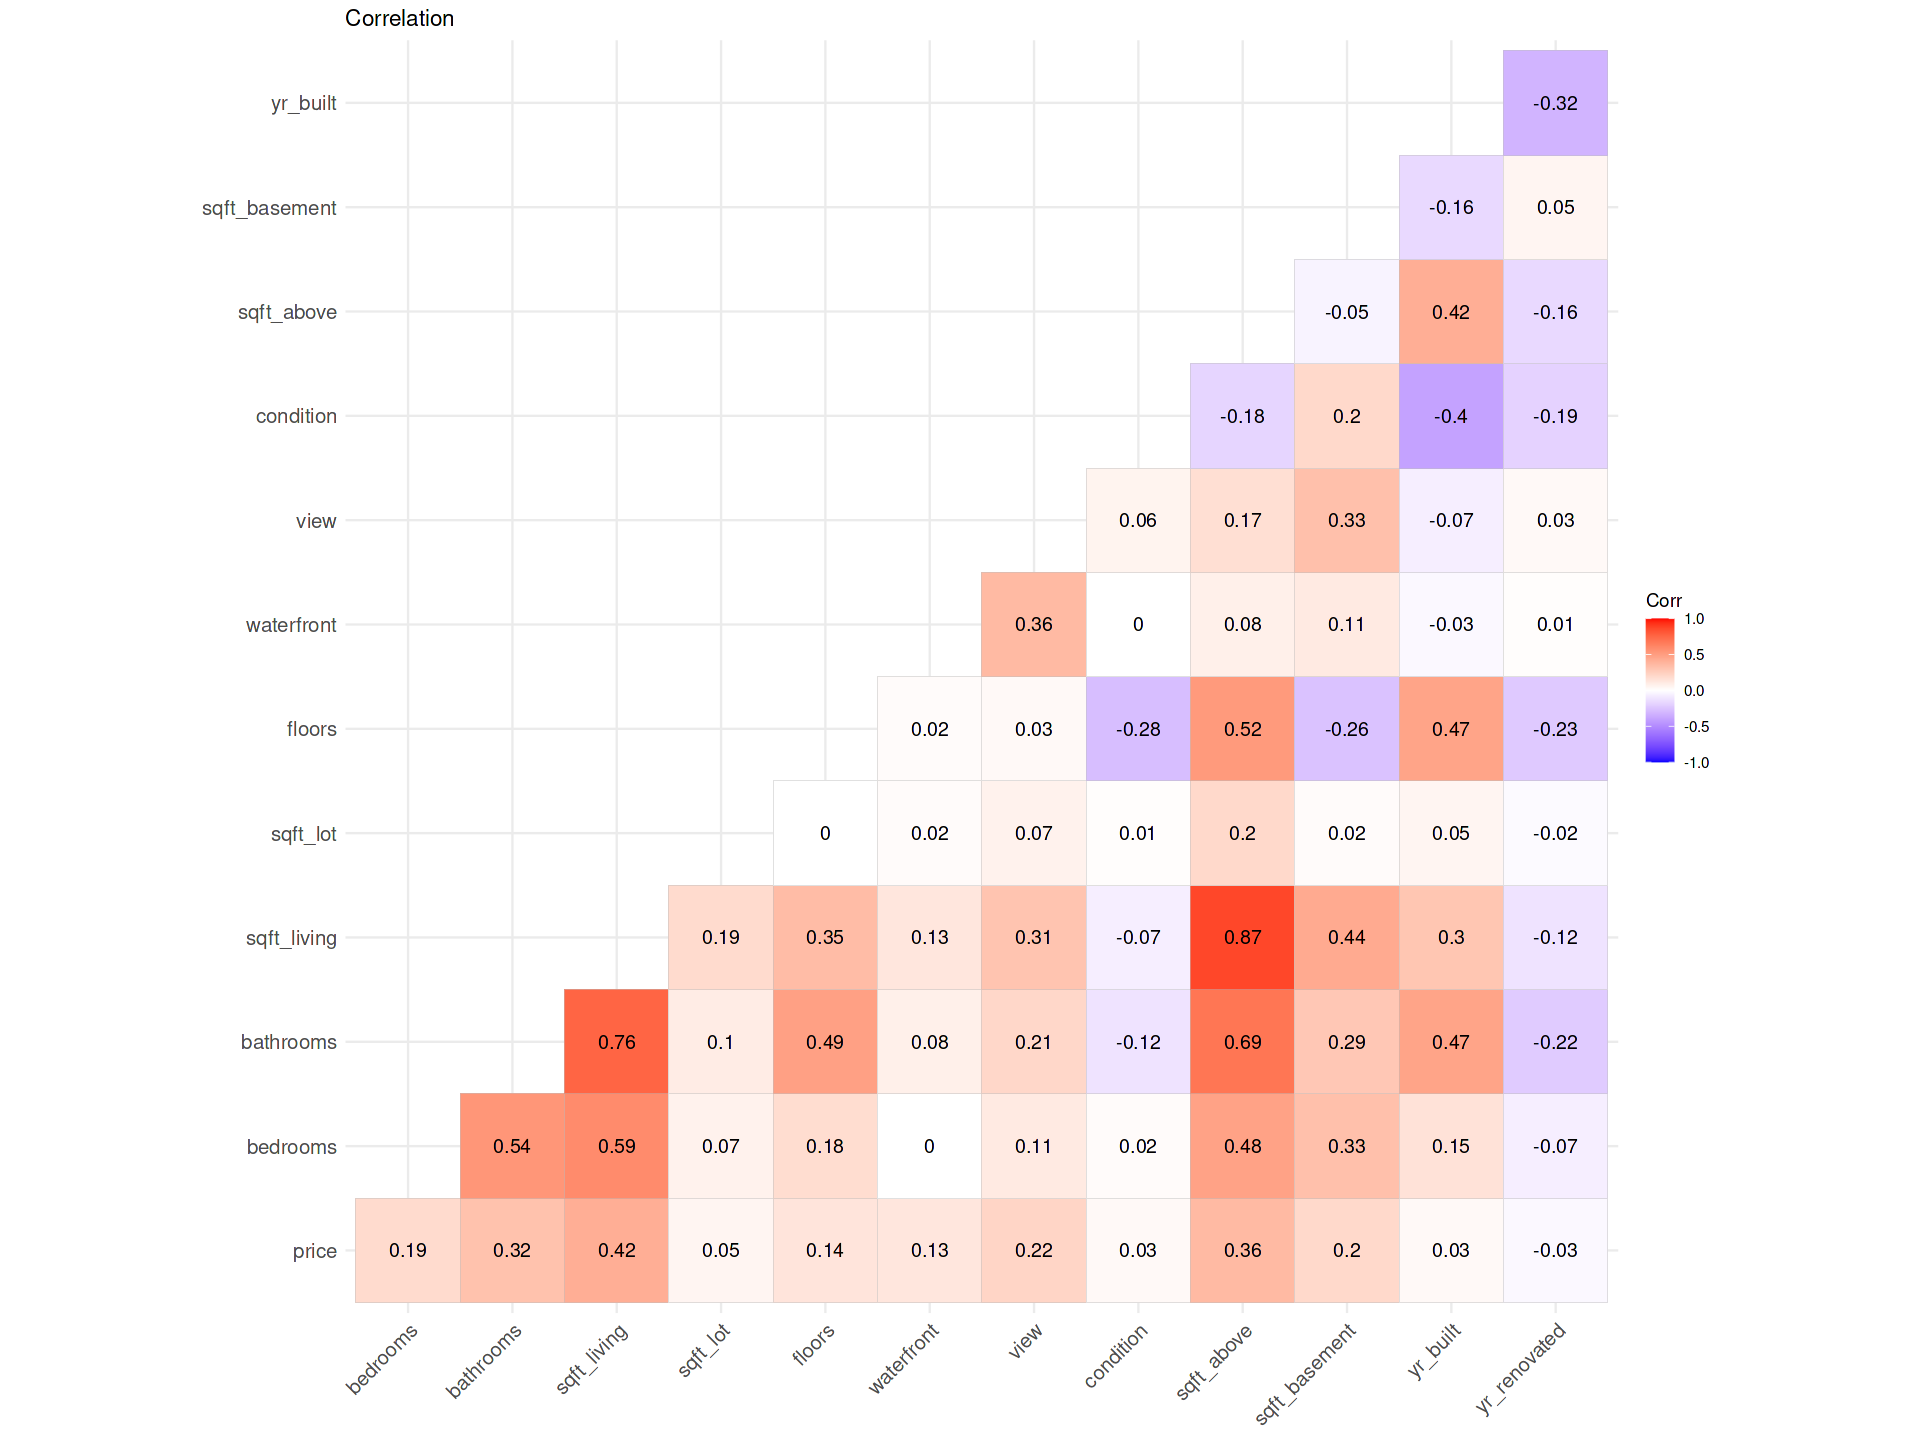

In [23]:
ggcorrplot(cor(df[num_cols]) , type = "lower", lab=T, title = 'Correlation')

# **4. Modeling**

In [24]:
library(caret)
library(Metrics)
library(mltools)
library(data.table)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress



Attaching package: ‘Metrics’


The following objects are masked from ‘package:caret’:

    precision, recall



Attaching package: ‘mltools’


The following objects are masked from ‘package:Metrics’:

    mse, msle, rmse, rmsle


The following object is masked from ‘package:tidyr’:

    replace_na



Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




## **Preprocessing**

In [25]:
df <- df %>% select(-statezip, -street, -country)

df$city <- as.factor(df$city)
#df$country <- as.factor(df$country)

## **Encoding**

In [26]:
encoding_data <- one_hot(as.data.table(df))

## **Train Test Split**

In [27]:
idx <- sample(1:nrow(encoding_data), 0.7 * nrow(encoding_data))
train <- encoding_data[idx,]
test <- encoding_data[-idx,]

In [28]:
model_lm <- lm(price ~ ., data = train)

In [29]:
summary(model_lm)


Call:
lm(formula = price ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2308220  -108752    -6623    72000 26200035 

Coefficients: (4 not defined because of singularities)
                                 Estimate      Std. Error t value    Pr(>|t|)
(Intercept)               -22066915.83962  10405839.12654  -2.121     0.03404
date                           1449.52194       633.71368   2.287     0.02225
bedrooms                     -45514.44279     15947.55948  -2.854     0.00435
bathrooms                     44277.72677     26241.04084   1.687     0.09165
sqft_living                     172.31305        34.07449   5.057 0.000000453
sqft_lot                         -0.05128         0.33728  -0.152     0.87918
floors                       -26093.12017     31124.87411  -0.838     0.40191
waterfront                   547490.76381    139939.31928   3.912 0.000093544
view                          44415.31735     16312.79823   2.723     0.00651
condition      

In [30]:
best_model <- step(model_lm, direction = 'backward')

Start:  AIC=77086.06
price ~ date + bedrooms + bathrooms + sqft_living + sqft_lot + 
    floors + waterfront + view + condition + sqft_above + sqft_basement + 
    yr_built + yr_renovated + city_Algona + city_Auburn + `city_Beaux Arts Village` + 
    city_Bellevue + `city_Black Diamond` + city_Bothell + city_Burien + 
    city_Carnation + `city_Clyde Hill` + city_Covington + `city_Des Moines` + 
    city_Duvall + city_Enumclaw + `city_Fall City` + `city_Federal Way` + 
    city_Issaquah + city_Kenmore + city_Kent + city_Kirkland + 
    `city_Lake Forest Park` + `city_Maple Valley` + city_Medina + 
    `city_Mercer Island` + city_Milton + city_Newcastle + `city_Normandy Park` + 
    `city_North Bend` + city_Pacific + city_Preston + city_Ravensdale + 
    city_Redmond + city_Renton + city_Sammamish + city_SeaTac + 
    city_Seattle + city_Shoreline + city_Skykomish + city_Snoqualmie + 
    `city_Snoqualmie Pass` + city_Tukwila + city_Vashon + city_Woodinville + 
    `city_Yarrow Point`



In [31]:
summary(best_model)


Call:
lm(formula = price ~ date + bedrooms + bathrooms + sqft_living + 
    waterfront + view + condition + sqft_above + yr_built + city_Auburn + 
    city_Bothell + city_Burien + `city_Clyde Hill` + city_Covington + 
    `city_Des Moines` + city_Duvall + city_Enumclaw + `city_Federal Way` + 
    city_Issaquah + city_Kenmore + city_Kent + `city_Lake Forest Park` + 
    `city_Maple Valley` + city_Medina + `city_North Bend` + city_Renton + 
    city_Sammamish + city_SeaTac + city_Shoreline + city_Snoqualmie + 
    city_Tukwila + city_Vashon + city_Woodinville, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2222032  -107472   -12246    73221 26217463 

Coefficients:
                            Estimate   Std. Error t value      Pr(>|t|)    
(Intercept)             -21680274.94  10302422.33  -2.104      0.035432 *  
date                         1434.39       630.13   2.276      0.022899 *  
bedrooms                   -43971.16     15828.79  -2.778      0.005506 *

In [32]:
pred_lm <- predict(best_model, test)

In [33]:
lm_mse <- mse(test$price, pred_lm)
lm_rmse <- rmse(test$price, pred_lm)
lm_mae <- mae(test$price,pred_lm)
lm_r2 <- R2(test$price,pred_lm)

In [34]:
lm_score <- data.frame(Indicators = c('MSE','RMSE','MAE','R2') , Score = c(lm_mse,lm_rmse ,lm_mae, lm_r2 ))
lm_score

Indicators,Score
<chr>,<dbl>
MSE,53531115556.4081116
RMSE,231367.9224880
MAE,138626.8708769
R2,0.5394208
